# <p style="background-color: #b71c1c; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Fraud Transaction Detection</p>

<a id="contents_tabel"></a>
<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">    

<h2 align="left"><font color=#b71c1c>Table of Contents</font></h2>
    
* [1. Introduction](#introduction)    
* [2. Import Necessary Libraries](#import)
* [3. Data Preparation and Exploration](#exploration)
* [4. Scaling and Distributing](#scaling)
* [5. Random Under-sampling](#undersampling)
* [6. Anomaly Detection](#anomaly)
* [7. Dimensionality Reduction and Clustering](#clustering)
* [8. Classifiers](#classifiers)
* [9. Use GridSearchCV to find the best parameters](#gridsearch)
* [10. SMOTE Technique (Over-sampling)](#smote)
* [11.Test Data with Logistic Regression](#test)
* [12. Comparison between Undersampling and Oversampling Score of Logistic Regression](#comparison)
* [13. Neural Networks Testing: Random UnderSampling vs. OverSampling (SMOTE)](#neural)
* [14. Conclusion](#conclusion)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

# <p style="background-color: #b71c1c; font-family:calibri; color:white; font-size:90%; font-family:Verdana; text-align:center; border-radius:15px 50px;">1. Introduction</p><a id="introduction"></a>

This project aims to detect potentially fraudulent transactions by leveraging various machine learning techniques on a highly imbalanced dataset. Credit card fraud is a significant concern in the financial sector, and identifying such activities accurately is crucial for enhancing transaction security. Given the sensitive nature of the data, the features have undergone a PCA transformation, except for the "time" and "amount" features, and are already scaled. This project involves preprocessing the data, handling imbalanced classes, and selecting suitable classification algorithms to develop an effective fraud detection model.

<h3 align="left"><font color=#b71c1c>Objectives:</font></h3>
    
1. **Detect Potentially Fraudulent Transactions**: Develop a machine learning model capable of identifying transactions that are likely fraudulent.
2. **Preprocess Data and Handle Imbalanced Classes**: Implement techniques such as random undersampling, oversampling, and the NearMiss algorithm to address the imbalance in the dataset.
3. **Select and Implement Suitable Classification Algorithms**: Evaluate the effectiveness of classifiers such as Logistic Regression, Decision trees, and Neural Networks.
4. **Train the Model**: Train the selected models on the labeled data to learn patterns indicative of fraud.
5. **Evaluate Model Performance**: Assess the accuracy of the models using metrics like precision, recall, and F1-score to ensure reliable detection of fraudulent transactions.

<h3 align="left"><font color=#b71c1c>Steps Taken:</font></h3>
    
1. **Understanding the Data**: An initial exploration of the dataset was conducted to understand the distribution of the "fraud" and "non-fraud" transactions. The data contains no null values, and the transaction amounts are relatively small, with a mean of approximately USD 88.
2. **Data Preprocessing**: The dataset was preprocessed by implementing scaling and distribution techniques. Given the imbalanced nature of the data (with fraud cases constituting only 0.17%), techniques such as Random Undersampling, Oversampling with SMOTE, and NearMiss Algorithm were employed to create a balanced sub-dataset.
3. **Feature Engineering**: Since the features are transformed using PCA, the focus was on the "time" and "amount" features, with an understanding that the other features have already been scaled.
4. **Model Selection and Training**: Various classifiers, including Logistic Regression, Decision Tree, and Neural Networks, were trained on the processed dataset to determine which model offered the highest accuracy in fraud detection.
5. **Evaluation**: The models were evaluated using precision, recall, F1-score, and confusion matrices instead of accuracy, which can be misleading with imbalanced datasets.

<h3 align="left"><font color=#b71c1c>Acknowledgment:</font></h3>

This project was inspired by and built upon the work of Janio Bachmann's kernel on Kaggle, "Credit Fraud: Dealing with Imbalanced Datasets." The kernel provided a comprehensive approach to handling imbalanced datasets and served as a valuable resource for understanding the challenges and solutions in fraud detection. I extend my gratitude to Janio Bachmann and the community for their contributions, which motivated me to delve deeper into this subject and improve upon the existing methodologies.

# <p style="background-color: #b71c1c; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">2. Importing necessary libraries</p><a id="import"></a>

In [1]:
# Imported Libraries
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA, TruncatedSVD 
import matplotlib.patches as mpatches
import time 

# Classifier Libraries
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
import collections  

# Other Libraries
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline

# imblearn Modules
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report 
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold 
import warnings
warnings.filterwarnings("ignore")

# <p style="background-color: #b71c1c; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">3. Data Preparation and Exploration</p><a id="exploration"></a>

In [2]:
df = pd.read_csv('./CreditCard/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#b71c1c>Overview of the Dataset:</font></h3>
<a id="gather"></a>

The dataset is crucial for understanding and detecting fraudulent transactions. The dataset consists of transactions, with features that have been scaled and anonymized due to privacy concerns. We only know the exact meaning of the "transaction time" and "transaction amount" features, while the other features have been transformed through PCA (Principal Component Analysis), a dimensionality reduction technique, to maintain data confidentiality.

<h4 align="left"><font color=#b71c1c>Summary</font></h4>

- **Transaction Amount**: The transaction amounts in the dataset are relatively small, with the mean being approximately USD 88.
- **No Missing Values**: There are no missing or null values in the dataset, eliminating the need for imputation or data replacement.
- **Class Imbalance**: The dataset is highly imbalanced, with non-fraudulent transactions making up 99.83% of the data, while fraudulent transactions account for only 0.17%.

<h4 align="left"><font color=#b71c1c>Feature Technicalities</font></h4>

- **PCA Transformation**: All features, except for "time" and "amount," have undergone PCA transformation to reduce dimensionality while preserving the essential structure of the data.
- **Scaling**: The features have been scaled, which is a necessary step before applying PCA. This ensures that all features contribute equally to the analysis and prevents any single feature from dominating due to its scale.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#b71c1c>Initial understanding of the data</font></h3>

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color= #b71c1c>Checking for null values to ensure data quality</font></h3>

In [4]:
df.isnull().sum().max()

0

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
No Null Values!

In [5]:
# Create a DataFrame with column names
columns_df = pd.DataFrame(df.columns, columns=['Columns'])

# Style the DataFrame
styled_columns_df = columns_df.style.set_properties(**{
    'background-color': '#f4f4f4',
    'color': '#333',
    'font-size': '16px',
    'text-align': 'left',
    'border': '1px solid #ddd'
}).hide(axis='index')

# Display the styled DataFrame
styled_columns_df

Columns
Time
V1
V2
V3
V4
V5
V6
V7
V8
V9


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color= #b71c1c>Class Distribution Analysis</font></h3>

In [6]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
The classes are heavily skewed.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
<h3 align="left"><font color= #b71c1c>Why is it problematic to use an imbalanced dataset as the base for predictive models in fraud detection?</font></h3>

Using an imbalanced dataset, where most transactions are non-fraudulent, can lead to significant issues in predictive modeling. The model may overfit by assuming that most transactions are not fraudulent, leading to poor generalization and a high number of errors when detecting actual fraud. This occurs because the model might predominantly learn patterns associated with non-fraudulent transactions, rather than focusing on identifying the subtle patterns that indicate fraudulent activity. The goal is to train the model to recognize these patterns and accurately detect fraud, rather than making assumptions based on the imbalance in the data.

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

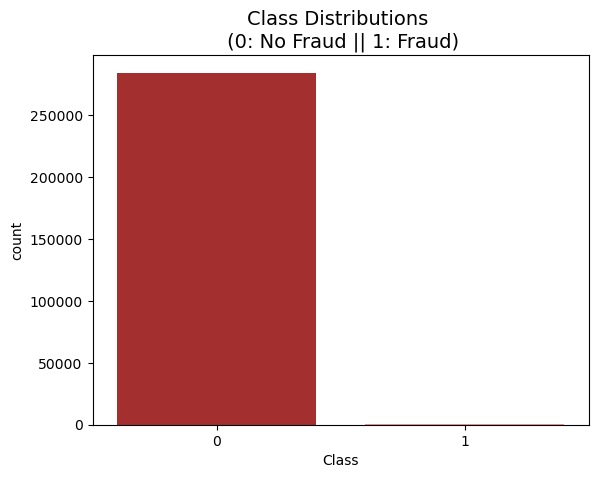

In [7]:
colors = ["#b71c1c", "#ff8a80"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
<h3 align="left"><font color= #b71c1c>Distributions:</font></h3>
By examining the distributions, we can gain insights into how skewed these features are. Observing the distribution of the features helps us understand their behavior and potential issues.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
<h3 align="left"><font color= #b71c1c>Feature Distribution(Amount and Time) Analysis</font></h3>
   
- Creates histograms for the 'Amount' and 'Time' features to understand their distributions.
- Helps identify any patterns or anomalies in these key features.

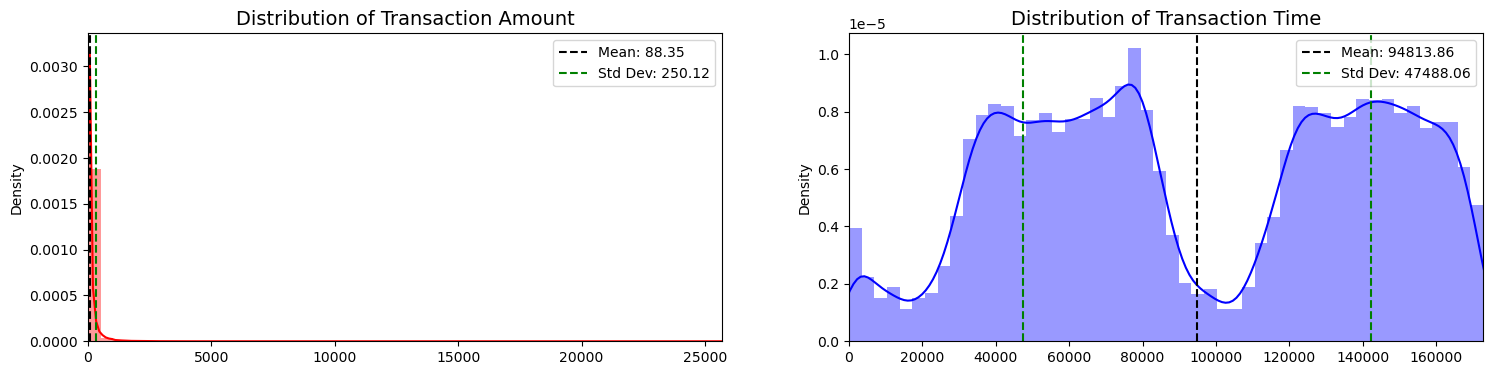

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = df['Amount'].values
time_val = df['Time'].values

# Calculate mean and standard deviation for amount and time
mean_amount = np.mean(amount_val)
std_amount = np.std(amount_val)
mean_time = np.mean(time_val)
std_time = np.std(time_val)

# Plot Distribution of Transaction Amount
sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].axvline(mean_amount, color='k', linestyle='--', label=f'Mean: {mean_amount:.2f}')
ax[0].axvline(mean_amount + std_amount, color='g', linestyle='--', label=f'Std Dev: {std_amount:.2f}')
ax[0].axvline(mean_amount - std_amount, color='g', linestyle='--')
ax[0].legend()

# Plot Distribution of Transaction Time
sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
ax[1].axvline(mean_time, color='k', linestyle='--', label=f'Mean: {mean_time:.2f}')
ax[1].axvline(mean_time + std_time, color='g', linestyle='--', label=f'Std Dev: {std_time:.2f}')
ax[1].axvline(mean_time - std_time, color='g', linestyle='--')
ax[1].legend()

plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
 
The high mean and standard deviation in the `Amount` feature suggest significant variability in transaction sizes, indicating the need for careful handling in predictive models. Similarly, the variability in the `Time` feature suggests transactions are spread across a broad time range, requiring further analysis.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
# <p style="background-color: #b71c1c; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">4. Scaling and Distributing</p><a id="scaling"></a>
In the data preprocessing phase, the `Time` and `Amount` features are scaled using `RobustScaler`, which is effective in handling outliers by focusing on the interquartile range. Scaling these features ensures that all input data is on a comparable scale, which is crucial for improving the performance and accuracy of machine learning models during training. This step helps in maintaining the consistency and reliability of the model predictions.

In [9]:
# Since most of our data has already been scaled, we need to scale the remaining columns: 'Amount' and 'Time'.
from sklearn.preprocessing import RobustScaler

# RobustScaler is chosen because it is less sensitive to outliers compared to other scalers.
rob_scaler = RobustScaler()

# Scaling the 'Amount' column and storing the result in a new column 'scaled_amount'.
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Scaling the 'Time' column and storing the result in a new column 'scaled_time'.
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Dropping the original 'Time' and 'Amount' columns since we have created their scaled versions.
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [10]:
# Extract the 'scaled_amount' and 'scaled_time' columns into separate variables.
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

# Drop the 'scaled_amount' and 'scaled_time' columns from their current positions in the DataFrame.
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Insert the 'scaled_amount' column back into the DataFrame at the first position (index 0).
df.insert(0, 'scaled_amount', scaled_amount)
# Insert the 'scaled_time' column back into the DataFrame at the second position (index 1).
df.insert(1, 'scaled_time', scaled_time)

In [11]:
# Amount and Time are Scaled!
df.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,0.927124,0.118914,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,...,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,0.001727
std,3.495006,0.557903,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-0.307413,-0.994983,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-0.229162,-0.358210,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,0.000000,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,0.770838,0.641790,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,358.683155,1.035022,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


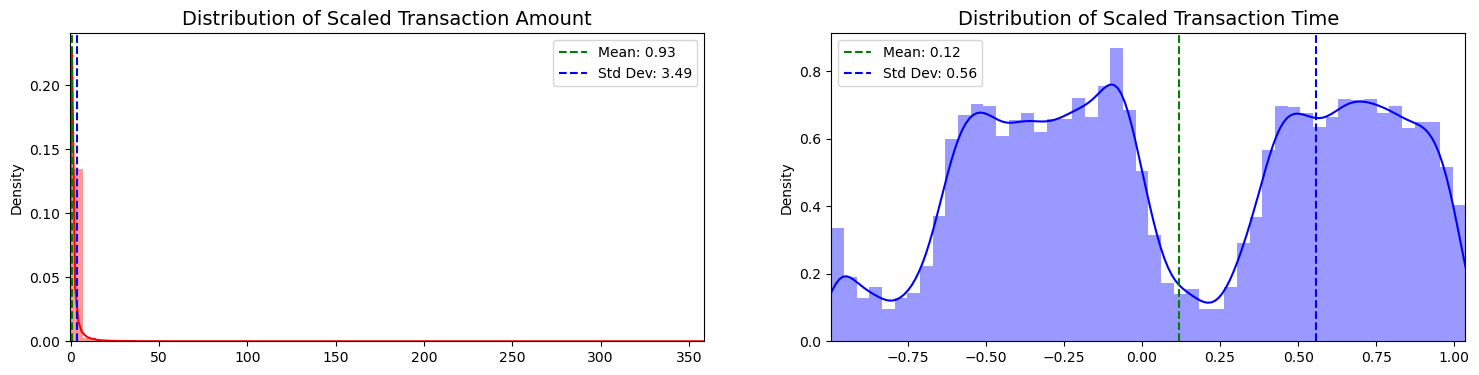

In [12]:
# Plot the distributions of the scaled features
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

scaled_amount = df['scaled_amount'].values
scaled_time = df['scaled_time'].values

# Distribution plot for scaled_amount
sns.distplot(scaled_amount, ax=ax[0], color='r')
ax[0].set_title('Distribution of Scaled Transaction Amount', fontsize=14)
ax[0].set_xlim([min(scaled_amount), max(scaled_amount)])
ax[0].axvline(scaled_amount.mean(), color='g', linestyle='--', label=f'Mean: {scaled_amount.mean():.2f}')
ax[0].axvline(scaled_amount.std(), color='b', linestyle='--', label=f'Std Dev: {scaled_amount.std():.2f}')
ax[0].legend()

# Distribution plot for scaled_time
sns.distplot(scaled_time, ax=ax[1], color='b')
ax[1].set_title('Distribution of Scaled Transaction Time', fontsize=14)
ax[1].set_xlim([min(scaled_time), max(scaled_time)])
ax[1].axvline(scaled_time.mean(), color='g', linestyle='--', label=f'Mean: {scaled_time.mean():.2f}')
ax[1].axvline(scaled_time.std(), color='b', linestyle='--', label=f'Std Dev: {scaled_time.std():.2f}')
ax[1].legend()

plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
   
After applying RobustScaler, both the `Time` and `Amount` features have been centered around a mean close to 0, with a reduced standard deviation. This scaling minimizes the impact of outliers, making the data more suitable for model training by ensuring that these features are on a similar scale to the rest of the dataset.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
<h3 align="left"><font color=#b71c1c>Splitting the Data (Original DataFrame)</font></h3>
    
**Question:** Why is it important to test models on the original testing set rather than on the testing set created by Random UnderSampling or OverSampling techniques?

**Answer:** Testing models on the original testing set ensures that the model's performance is evaluated on real-world, unaltered data. This helps in accurately assessing how well the model generalizes to unseen data, rather than relying on the potentially biased or altered distributions introduced by under-sampling or over-sampling techniques.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#b71c1c>Data Splitting</font></h3>
    
   - The dataset is split into training and testing sets using StratifiedKFold.
   - This method ensures that the class distribution is maintained in both sets.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

# StratifiedShuffleSplit() is used to ensure that the class distribution (fraud vs. non-fraud) is maintained in both the training and testing sets.
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    # creating variables original_Xtrain, original_Xtest, original_ytrain, and original_ytest to store the training and testing sets.
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index] #  using the iloc[] function to access the data based on the indices returned by StratifiedShuffleSplit().
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.

# Check the Distribution of the labels
# Converting the training and testing sets from pandas DataFrames to numpy arrays for easier handling in subsequent steps.
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# Checking if the label distributions (fraud vs. non-fraud) are similar in both the training and testing sets.
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True) # Using np.unique() and the returned counts to calculate the percentage of each class in the training and testing sets.
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

# <p style="background-color: #b71c1c; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">5. Random Under-sampling</p><a id="undersampling"></a>
Implementing **Random Under-Sampling** to handle the class imbalance in the dataset.

<h3 align="left"><font color=#b71c1c>Steps:</font></h3>
    
<h4 align="left"><font color=#b71c1c>1. Determine the Class Imbalance:</font></h4>
    
   - We will use the `value_counts()` function on the `'Class'` column to determine the number of fraud (1) and non-fraud (0) transactions.
   - This will help us understand the extent of class imbalance in the dataset.

<h4 align="left"><font color=#b71c1c>2. Balance the Dataset:</font></h4>
    
   - We will identify the number of fraud transactions, which is the minority class.
   - We will then randomly select an equal number of non-fraud transactions (majority class) to create a balanced dataset.
   - This will result in a 50/50 ratio of fraud and non-fraud transactions.

<h4 align="left"><font color=#b71c1c>3. Shuffle the Data:</font></h4>
   
   - After creating the balanced dataset, we will shuffle the data to ensure that the model can maintain a certain accuracy regardless of the order of the instances.

**Note**: The main issue with **Random Under-Sampling** is that it can lead to a significant **information loss**. By reducing the number of non-fraud transactions from 284,315 to 492, we are discarding a large amount of data, which may impact the model's performance. This trade-off between class balance and information loss should be carefully considered when choosing the appropriate technique to handle the class imbalance.

</div>

In [14]:
# Since our classes are highly skewed, we need to balance them to achieve a more normal distribution.
# This will help the model learn better and not be biased towards the majority class.

# Shuffle the data to ensure randomness before creating balanced subsamples.
df = df.sample(frac=1)

# Separate the fraud and non-fraud classes.
# 'fraud_df' contains all the rows where the 'Class' label is 1 (fraud).
fraud_df = df.loc[df['Class'] == 1]
# 'non_fraud_df' contains an equal number of rows where the 'Class' label is 0 (non-fraud) as there are fraud cases.
# We limit the number of non-fraud cases to 492 to match the number of fraud cases.
non_fraud_df = df.loc[df['Class'] == 0][:492]

# Combine the fraud and the sampled non-fraud dataframes to create a balanced dataset.
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle the rows of the newly created balanced dataframe to ensure randomness.
new_df = normal_distributed_df.sample(frac=1, random_state=42)

# Display the first few rows of the balanced dataframe.
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
4011,-0.296653,-0.952126,-1.925089,2.107839,-0.111313,-1.499387,-0.312664,-0.409765,-0.342936,0.813228,...,0.318772,-0.358675,-0.786881,-0.026200,-1.048176,0.161684,0.779759,0.178955,0.162930,0
151807,0.161951,0.136268,-3.552173,5.426461,-3.731810,6.679062,-2.187543,2.433940,-8.748110,-12.108284,...,3.792667,-5.688990,2.510980,0.953933,-0.542506,-0.620152,0.406013,0.023025,0.164741,1
1610,-0.293440,-0.980275,-0.484737,1.591112,0.520804,0.632684,0.845214,-0.906496,0.993208,-0.299765,...,0.043709,0.036630,0.097585,-0.331099,-0.073783,0.327877,-0.377025,-0.210514,0.075994,0
58422,2.607140,-0.426603,-2.790771,-1.464269,1.031165,1.921356,-0.090014,-0.483871,0.780731,-0.348776,...,-1.376721,-0.392667,0.440020,0.777659,0.418552,0.244563,-0.159361,0.060540,0.356958,1
15781,1.089779,-0.675208,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,...,1.658289,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,1


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">  
    
With properly balanced dataframe, we can proceed with more in-depth **analysis** and **data preprocessing** steps.

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


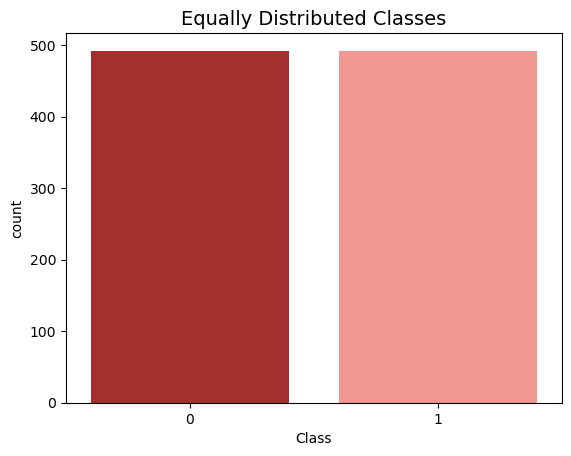

In [15]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
The distribution of classes in the subsample dataset indicates that the dataset is perfectly balanced, with 50% of the data representing non-fraudulent transactions (Class 0) and 50% representing fraudulent transactions (Class 1). This balanced distribution is crucial for training models that can accurately detect fraud without being biased towards the majority class.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
<h2 align="left"><font color=#b71c1c>Correlation Matrices</font></h2>
Correlation matrices play a vital role in understanding our dataset, particularly in identifying which features significantly influence whether a transaction is fraudulent. In our project, using the correct dataframe (subsample) is essential to accurately observe which features have strong positive or negative correlations with fraudulent transactions.

 
<h3 align="left"><font color=#b71c1c>Summary and Insights:</font></h3>

<ul>
<li><b>Negative Correlations:</b>Features such as V17, V14, V12, and V10 show negative correlations, indicating that lower values of these features increase the likelihood of a transaction being fraudulent.</li>
<li> <b> Positive Correlations: </b>Features like V2, V4, V11, and V19 exhibit positive correlations, meaning that higher values in these features are more likely associated with fraud.</li>
<li> <b>BoxPlots:</b>We employ boxplots to gain deeper insight into how these features are distributed across fraudulent and non-fraudulent transactions.</li>
</ul>

These observations help us fine-tune our models by focusing on features with significant correlations, ultimately improving fraud detection accuracy.

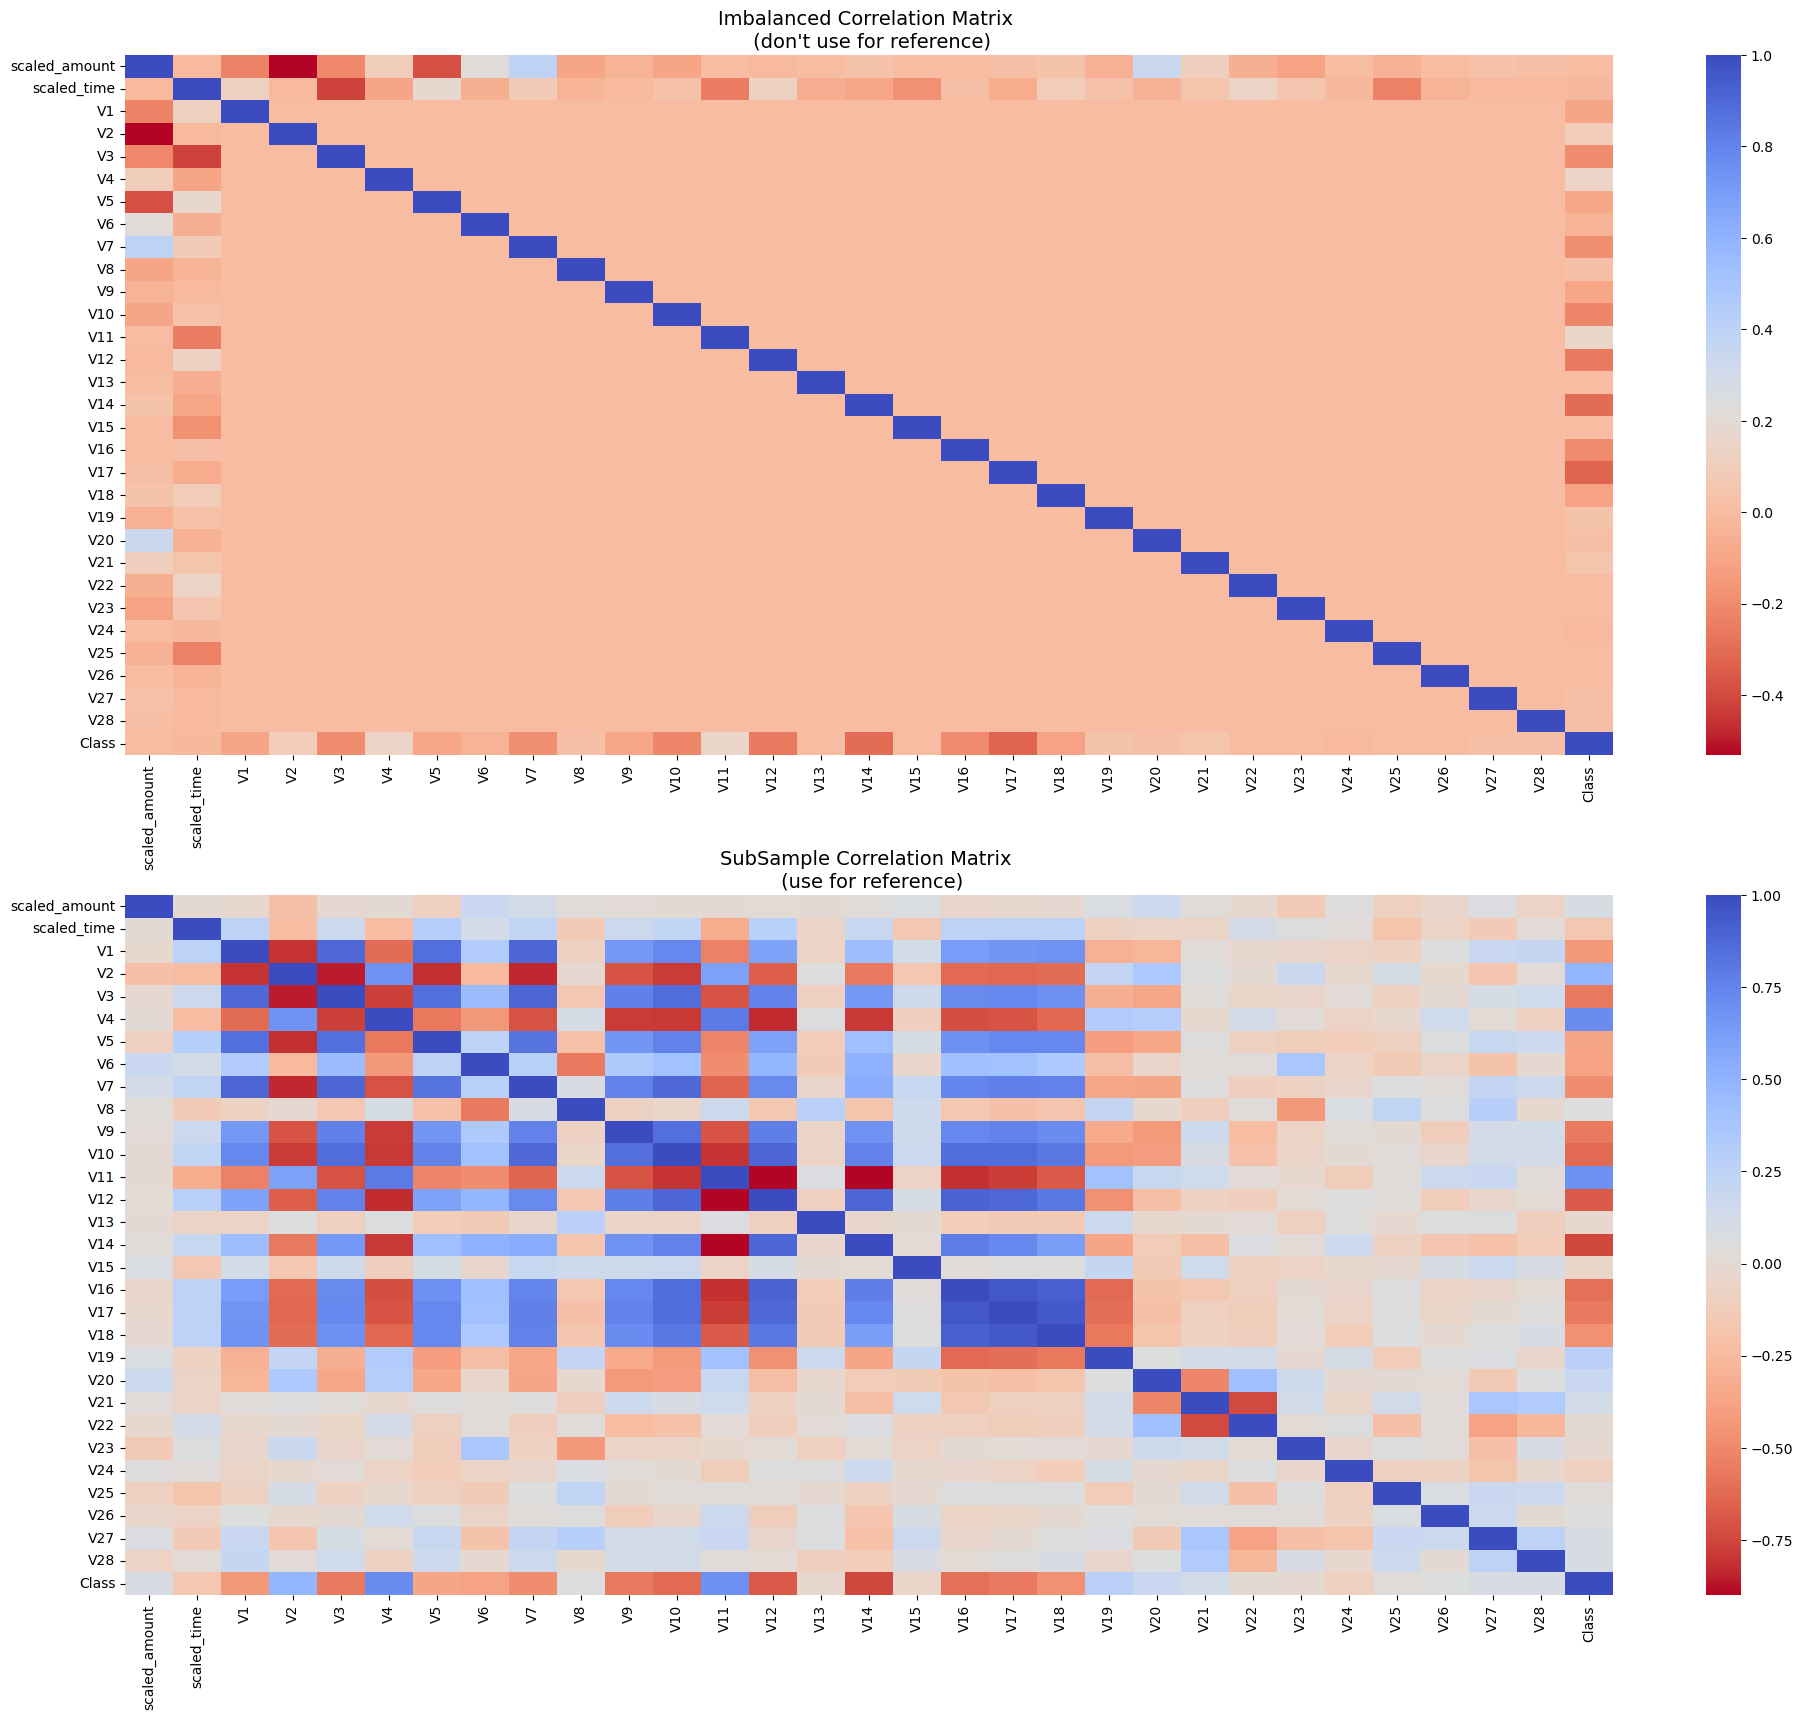

In [16]:
# Using the subsample in our correlation
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
**Question:** Why is it crucial to use the subsample for the correlation matrix instead of the original dataframe?

**Observation:** The original dataframe's high class imbalance can distort the correlation matrix, leading to misleading interpretations. By using a balanced subsample, we can more accurately identify features with strong positive or negative correlations to fraud, which is essential for effective model training.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
<h3 align="left"><font color=#b71c1c>Feature Analysis</font></h3>

- Boxplots are utilized to visually analyze the distribution of features that show significant correlations with the target feature (class). 
- Features like V17, V14, V12, and V10, which exhibit negative correlations with the class, reveal in the boxplots that lower values are more prevalent in fraudulent transactions. 
- Features such as V11, V4, V2, and V19, which have positive correlations with the class, show that higher values are more common in fraudulent transactions. 
These boxplots help us understand the relationship between specific feature values and the likelihood of fraud, providing crucial insights for model development.

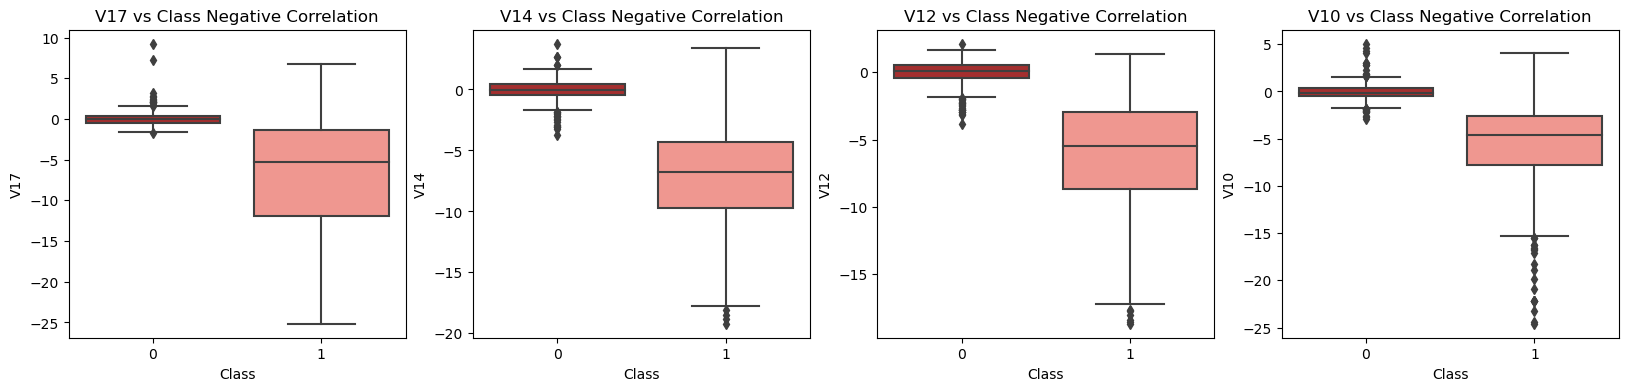

In [17]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

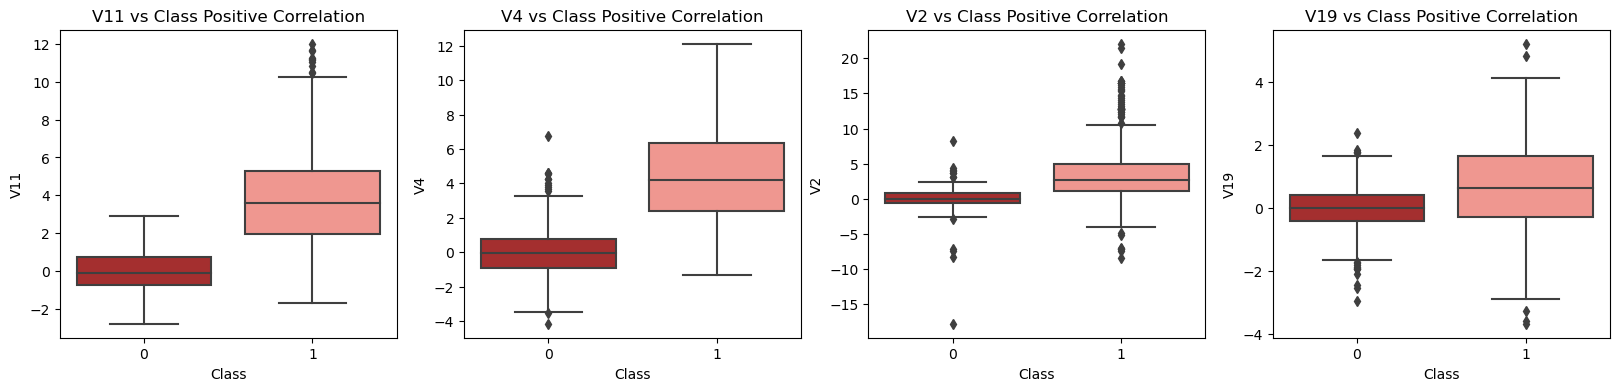

In [18]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

 <div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
# <p style="background-color: #b71c1c; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">6. Anomaly Detection:</p><a id="anomaly"></a>

Our primary objective is to remove "extreme outliers" from features that exhibit a strong correlation with the target classes. This process is anticipated to enhance the accuracy of our models.

<h3 align="left"><font color=#b71c1c>What is interquartile range method?</font></h3>
<ul>
<li> <b>Interquartile Range (IQR): </b> The IQR is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. Our goal is to establish a threshold beyond the 75th and 25th percentiles; any data points exceeding this threshold are considered outliers and will be removed.</li>
<li> <b>Boxplots:</b>Boxplots allow us to easily visualize the 25th and 75th percentiles (the ends of the box) and identify extreme outliers (points beyond the lower and upper extremes).</li>
</ul>

<h3 align="left"><font color=#b71c1c>Outlier Removal Tradeoff:</font></h3>
When removing outliers, we must carefully determine the threshold. This threshold is set by multiplying the IQR by a factor (e.g., 1.5). A higher multiplier results in fewer outliers being detected, while a lower multiplier detects more outliers.
<br>

<h3 align="left"><font color=#b71c1c>The Tradeoff:</font></h3>
A lower threshold will remove more outliers, but our focus should be on eliminating "extreme outliers" rather than all outliers. Removing too many outliers may result in significant information loss, leading to reduced model accuracy. Experimenting with different thresholds can help assess their impact on classification model accuracy.

<h3 align="left"><font color=#b71c1c>Summary:</font></h3>
<ul>
<li> <b> Visualize Distributions: </b>We begin by visualizing the distribution of the features from which we intend to remove outliers. Feature V14, for instance, exhibits a Gaussian distribution, unlike V12 and V10.</li>
<li><b>Determining the Threshold: </b>After selecting the multiplier for the IQR, we calculate the upper and lower thresholds by subtracting Q1 - threshold (lower extreme) and adding Q3 + threshold (upper extreme).</li>
<li> <b>Conditional Dropping: </b>We then apply conditional logic to drop instances where the values exceed these thresholds./li>
<li> <b> Boxplot Representation:</b> By examining boxplots, we can confirm that the number of "extreme outliers" has been significantly reduced.</li>
</ul>

**Note:** After reducing outliers, our model accuracy improved by over 3%. While outliers can distort model accuracy, it is essential to balance outlier removal with preserving valuable data to avoid underfitting.

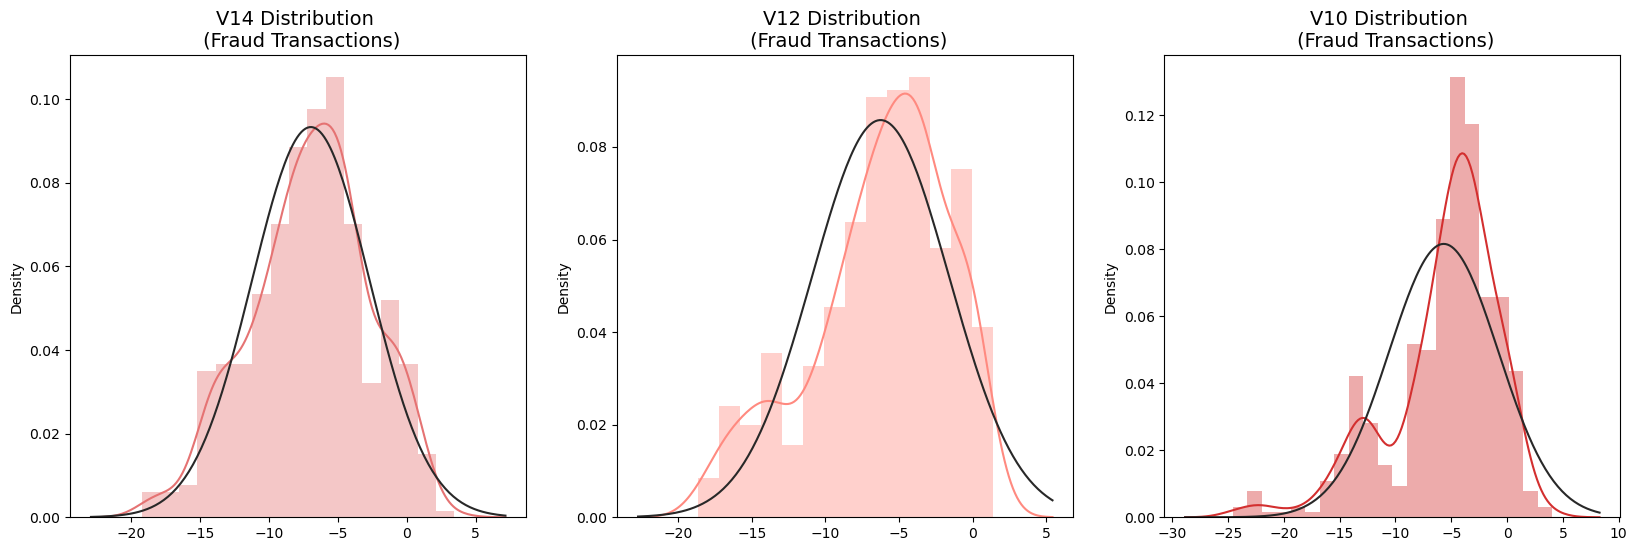

In [19]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#E57373')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#FF8A80')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#D32F2F')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [20]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.4937733551053, -18.0499976898594, -18.8220867423816, -19.2143254902614]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.4311310279993, -18.5536970096458, -18.0475965708216, -18.6837146333443]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-22.1870885620007, -16.303537

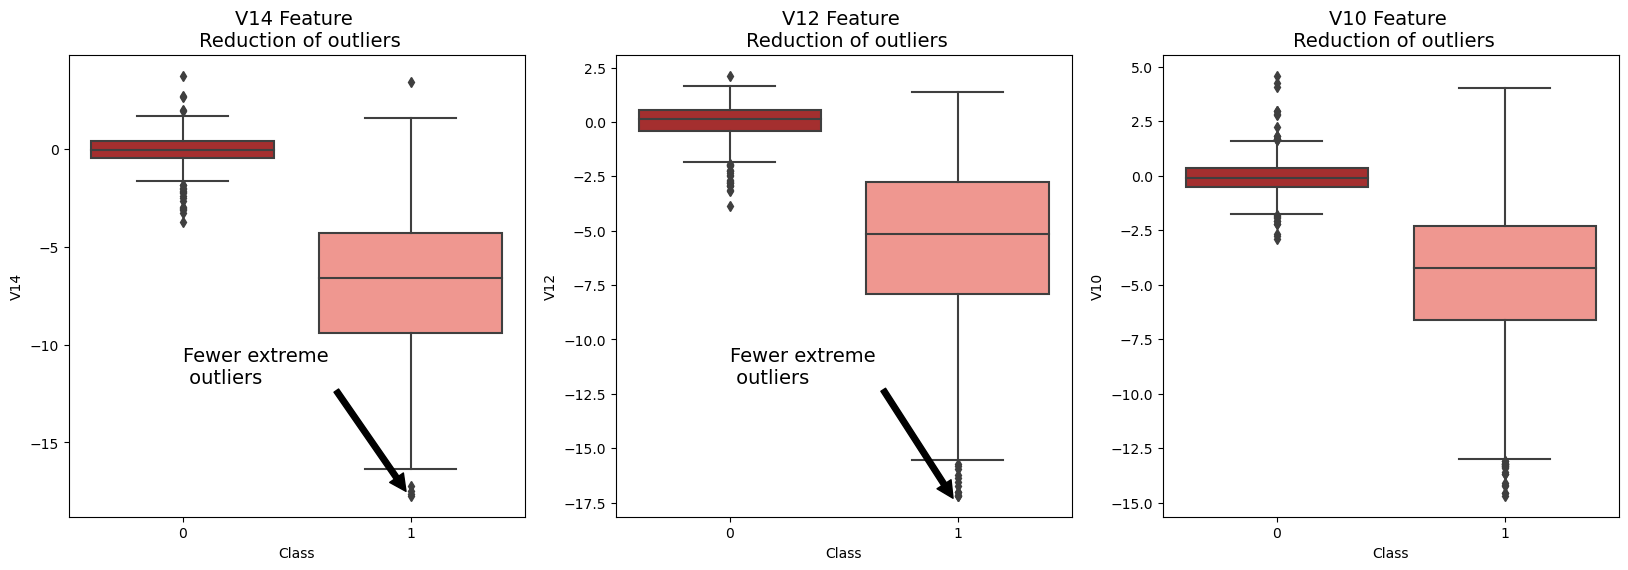

In [21]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
colors = ["#b71c1c", "#ff8a80"]
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
# <p style="background-color: #b71c1c; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">7. Dimensionality Reduction and Clustering:</p><a id="clustering"></a>
    
<h3 align="left"><font color=#b71c1c>Understanding t-SNE:</font></h3>
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a powerful non-linear dimensionality reduction technique often used for visualizing high-dimensional datasets. It works by converting similarities between data points into joint probabilities and then tries to minimize the divergence between these probabilities in the low-dimensional space. This results in a map that highlights clusters of similar data points, making it particularly effective for tasks like fraud detection. t-SNE is well-suited for uncovering hidden patterns and visualizing complex data structures.
<ul>
<li><b>Euclidean Distance:</b> Measures the straight-line distance between two points in space.</li>
<li><b>Conditional Probability:</b> t-SNE uses conditional probabilities to measure how similar a point is to another point in high-dimensional space.</li>
<li><b>Normal and T-Distribution Plots:</b> Understanding these distributions helps in grasping how t-SNE manages the spread of points in lower-dimensional space.</li>
<li>t-SNE is effective in clustering both fraud and non-fraud cases, even in a relatively small subsample.</li>
<li>It demonstrates consistent accuracy across various scenarios, making it a reliable tool for identifying patterns in imbalanced datasets.</li>
<li>As a non-linear method, t-SNE captures complex relationships between data points, which can be valuable in tasks that require distinguishing subtle differences in data.</li>
</ul>
<h3 align="left"><font color=#b71c1c>Truncated SVD:</font></h3>
Truncated Singular Value Decomposition (Truncated SVD) is another popular dimensionality reduction technique, particularly well-suited for sparse datasets like those encountered in natural language processing. Unlike t-SNE, which is a non-linear method, Truncated SVD is a linear technique. It works by decomposing a matrix into its constituent singular values and vectors, allowing us to reduce the dimensionality of the data while retaining the most significant features. Truncated SVD is computationally efficient and can be a powerful tool when the data is sparse and high-dimensional, as it retains the linearity of the data, making it suitable for linear models.

<h3 align="left"><font color=#b71c1c>Principal Component Analysis (PCA):</font></h3>
Principal Component Analysis (PCA) is one of the most widely used techniques for dimensionality reduction. It transforms the original features into a new set of orthogonal components (principal components), which are ordered by the amount of variance they capture from the data. The first few principal components capture most of the variability in the data, allowing us to reduce the dimensionality while preserving the most important information. PCA is especially useful when the data is dense and continuous. It helps in identifying the directions (principal components) that maximize the variance and are often used as a preprocessing step for clustering, classification, or visualization tasks. Unlike t-SNE, which is non-linear, PCA is a linear method and assumes that the data follows a Gaussian distribution.

<h3 align="left"><font color=#b71c1c>Comparison and Application:</font></h3>
    
- **t-SNE** excels in visualizing complex data structures and is particularly effective for clustering tasks where the goal is to uncover hidden patterns in the data. It is non-linear and captures intricate relationships between data points.
- **Truncated SVD** is best suited for sparse datasets and scenarios where linear relationships are predominant. It is often used in text mining and natural language processing tasks.
- **PCA** is ideal for dense datasets and situations where linear relationships are key. It is widely used as a preprocessing step for various machine learning algorithms.

In [22]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 2.1 s
PCA took 0.11 s
Truncated SVD took 0.0051 s


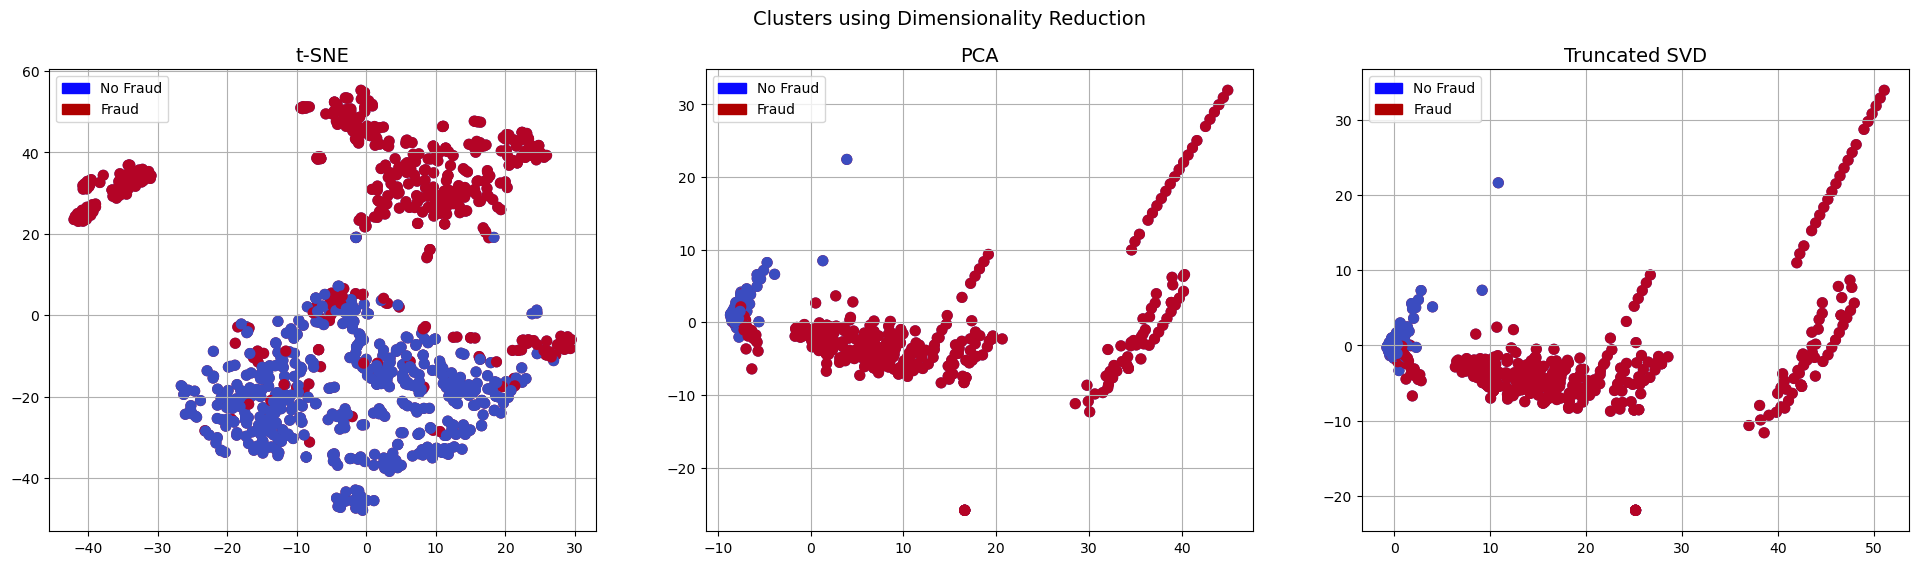

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')
# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])
# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
# <p style="background-color: #b71c1c; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">8. Classifiers:</p><a id="classifiers"></a>
<a id="classifiers"></a>
In this section, we will train and evaluate four different classifiers to determine which one is most effective in detecting <b>fraudulent transactions</b>. Before training, we split our data into training and testing sets, ensuring a clear separation between features and labels.

<h2 align="left"><font color=#b71c1c>Classifiers Overview:</font></h2>

<h3 align="left"><font color=#b71c1c>1. Logistic Regression:</font></h3>
Logistic Regression is a linear model used for binary classification. It predicts the probability that a given input belongs to a certain class (fraud or non-fraud). This classifier is particularly effective when the relationship between the features and the target variable is approximately linear. Logistic Regression is computationally efficient and often serves as a strong baseline model. In our evaluation, Logistic Regression demonstrated the highest accuracy and ROC-AUC scores, making it a reliable choice for detecting fraud.

<h3 align="left"><font color=#b71c1c>2. K-Nearest Neighbors (KNN):</font></h3>
K-Nearest Neighbors is a non-parametric, instance-based learning algorithm. It classifies a data point based on the majority class of its k-nearest neighbors in the feature space. KNN is intuitive and easy to implement, but its performance can be significantly affected by the choice of k and the distance metric used. In our experiments, KNN showed moderate accuracy, but it is prone to high variance, especially when dealing with noisy data.

<h3 align="left"><font color=#b71c1c>3. Support Vector Classifier (SVC):</font></h3>
Support Vector Classifier is a powerful algorithm that works by finding the hyperplane that best separates the classes in the feature space. It is effective in high-dimensional spaces and is versatile with the use of different kernel functions (e.g., linear, polynomial, radial basis function). SVC is known for its robustness, but it can be computationally expensive, especially with large datasets. In our analysis, SVC provided good accuracy but was outperformed by Logistic Regression.
    
<h3 align="left"><font color=#b71c1c>4. Random Forest:</font></h3>
Random Forest is an ensemble learning method that builds multiple decision trees and merges them to improve accuracy and reduce the risk of overfitting. By averaging the results of several trees, Random Forest mitigates the instability of individual decision trees and enhances generalization. It can handle large datasets and maintain performance even with missing data. In our study, the Random Forest classifier outperformed the Decision Tree model by providing more robust and reliable predictions, demonstrating its effectiveness in handling complex datasets with imbalanced classes.
<h2 align="left"><font color=#b71c1c>Summary:</font></h2>
 
- **Logistic Regression** emerged as the most accurate and reliable classifier among the four, with the best ROC-AUC score, indicating a strong ability to distinguish between fraud and non-fraud transactions.
- **GridSearchCV** was employed to fine-tune the hyperparameters of each classifier, ensuring optimal performance.
- **Learning Curves** were used to evaluate the models' performance, revealing that Logistic Regression had the most balanced training and cross-validation scores, indicating neither overfitting nor underfitting.

In [24]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [25]:
# Already scaled, so we should split our training and test sets
from sklearn.model_selection import train_test_split

# Explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [27]:
# Let's implement simple classifiers
from sklearn.ensemble import RandomForestClassifier
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [28]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 93.0 % accuracy score


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Wow! The scores are getting even high scores even when applying cross validation.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
# <p style="background-color: #b71c1c; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">9. Use GridSearchCV to find the best parameters:</p><a id="gridsearch"></a>
   
<h3 align="left"><font color=#b71c1c>1. Logistic Regression:</font></h3>

   - `penalty`: This parameter specifies the type of regularization to use. 'l1' refers to Lasso regularization, and 'l2' refers to Ridge regularization. Regularization helps prevent overfitting by adding a penalty term to the cost function.
   - `C`: This parameter is the inverse of the regularization strength. A smaller value of `C` corresponds to stronger regularization.

<h3 align="left"><font color=#b71c1c>2. K-Nearest Neighbors (KNN):</font></h3>
   
   - `n_neighbors`: This parameter specifies the number of neighbors to use for the majority vote in the KNN algorithm. It determines the size of the neighborhood considered for the prediction.
   - `algorithm`: This parameter specifies the algorithm to use for the nearest neighbors search. The options are 'auto', 'ball_tree', 'kd_tree', and 'brute'.

<h3 align="left"><font color=#b71c1c>3. Support Vector Classifier (SVC):</font></h3>
    
   - `C`: This parameter is the regularization parameter, similar to the `C` parameter in Logistic Regression. It controls the trade-off between the margin size and the number of misclassified samples.
   - `kernel`: This parameter specifies the kernel function to use in the SVC algorithm. The options are 'rbf' (Radial Basis Function), 'poly' (Polynomial), 'sigmoid', and 'linear'.

<h3 align="left"><font color=#b71c1c>4. Random Forest Classifier:</font></h3>

   - n_estimators: This parameter specifies the number of decision trees in the forest. A higher number of trees generally improves model performance by reducing variance but may increase computational cost.

   - criterion: This parameter determines the function used to measure the quality of a split within each tree. The options are 'gini' (Gini impurity) and 'entropy' (Information gain), similar to Decision Trees.
   - max_depth: This parameter specifies the maximum depth of each tree in the forest. Controlling the depth helps manage the complexity of the model and prevent overfitting.
   - min_samples_leaf: This parameter defines the minimum number of samples required to be at a leaf node in each tree. It helps control the complexity of individual trees within the forest, reducing the likelihood of overfitting.
   - max_features: This parameter defines the maximum number of features to consider when looking for the best split. Limiting the number of features can improve model performance and speed by reducing the correlation between individual trees.

The grid search is used to find the optimal combination of these hyperparameters for each model, which can improve the model's performance on the training data. The best estimators are then stored for further use in the model evaluation and prediction steps.

In [29]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# RandomForest Classifier
rf_params = {
    "n_estimators": [100, 200, 300], 
    "criterion": ["gini", "entropy"], 
    "max_depth": list(range(2, 6, 1)),
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params)
grid_rf.fit(X_train, y_train)
rf_clf = grid_rf.best_estimator_

In [30]:
# Overfitting Case
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(rf_clf, X_train, y_train, cv=5)
print('Random Forest Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.8%
Knears Neighbors Cross Validation Score 93.67%
Support Vector Classifier Cross Validation Score 93.01%
Random Forest Classifier Cross Validation Score 93.54%


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#b71c1c>Performance Comparison of Classifiers Using Under-Sampling before Cross-Validation:</font></h3>

- **Logistic Regression** outperforms the other classifiers with the highest cross-validation score, making it the most reliable model in this under-sampling scenario.
- **SVC** ,**Random Forest** and **KNN** are close competitors, with KNN slightly edging out SVC and Random Forest.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#b71c1c>Undersample during cross validating:</font></h3>

In [31]:
# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']
for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []
# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way
for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
# SMOTE happens during Cross Validation not before..
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 56952  56953  56954 ... 284804 284805 284806] Test: [    0     1     2 ... 63154 63596 63812]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56952  56953  56954 ... 113981 115173 115187]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113921 113922 113923 ... 170888 170889 170890]
Train: [     0      1      2 ... 284804 284805 284806] Test: [163896 164309 164802 ... 229330 229396 229419]
Train: [     0      1      2 ... 229330 229396 229419] Test: [227841 227842 227843 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
# <p style="background-color: #b71c1c; font-family:calibri; color:white; font-size:90%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Learning Curve:</p>
<h3 align="left"><font color=#b71c1c>Importance of Learning Curves:</font></h3>

Learning curves help diagnose how well a model is learning and whether adjustments need to be made, such as adding more training data, simplifying the model, or tuning hyperparameters. By analyzing these curves, we can better understand the model's behavior and make informed decisions to improve its performance.

In [32]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Random Forest Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

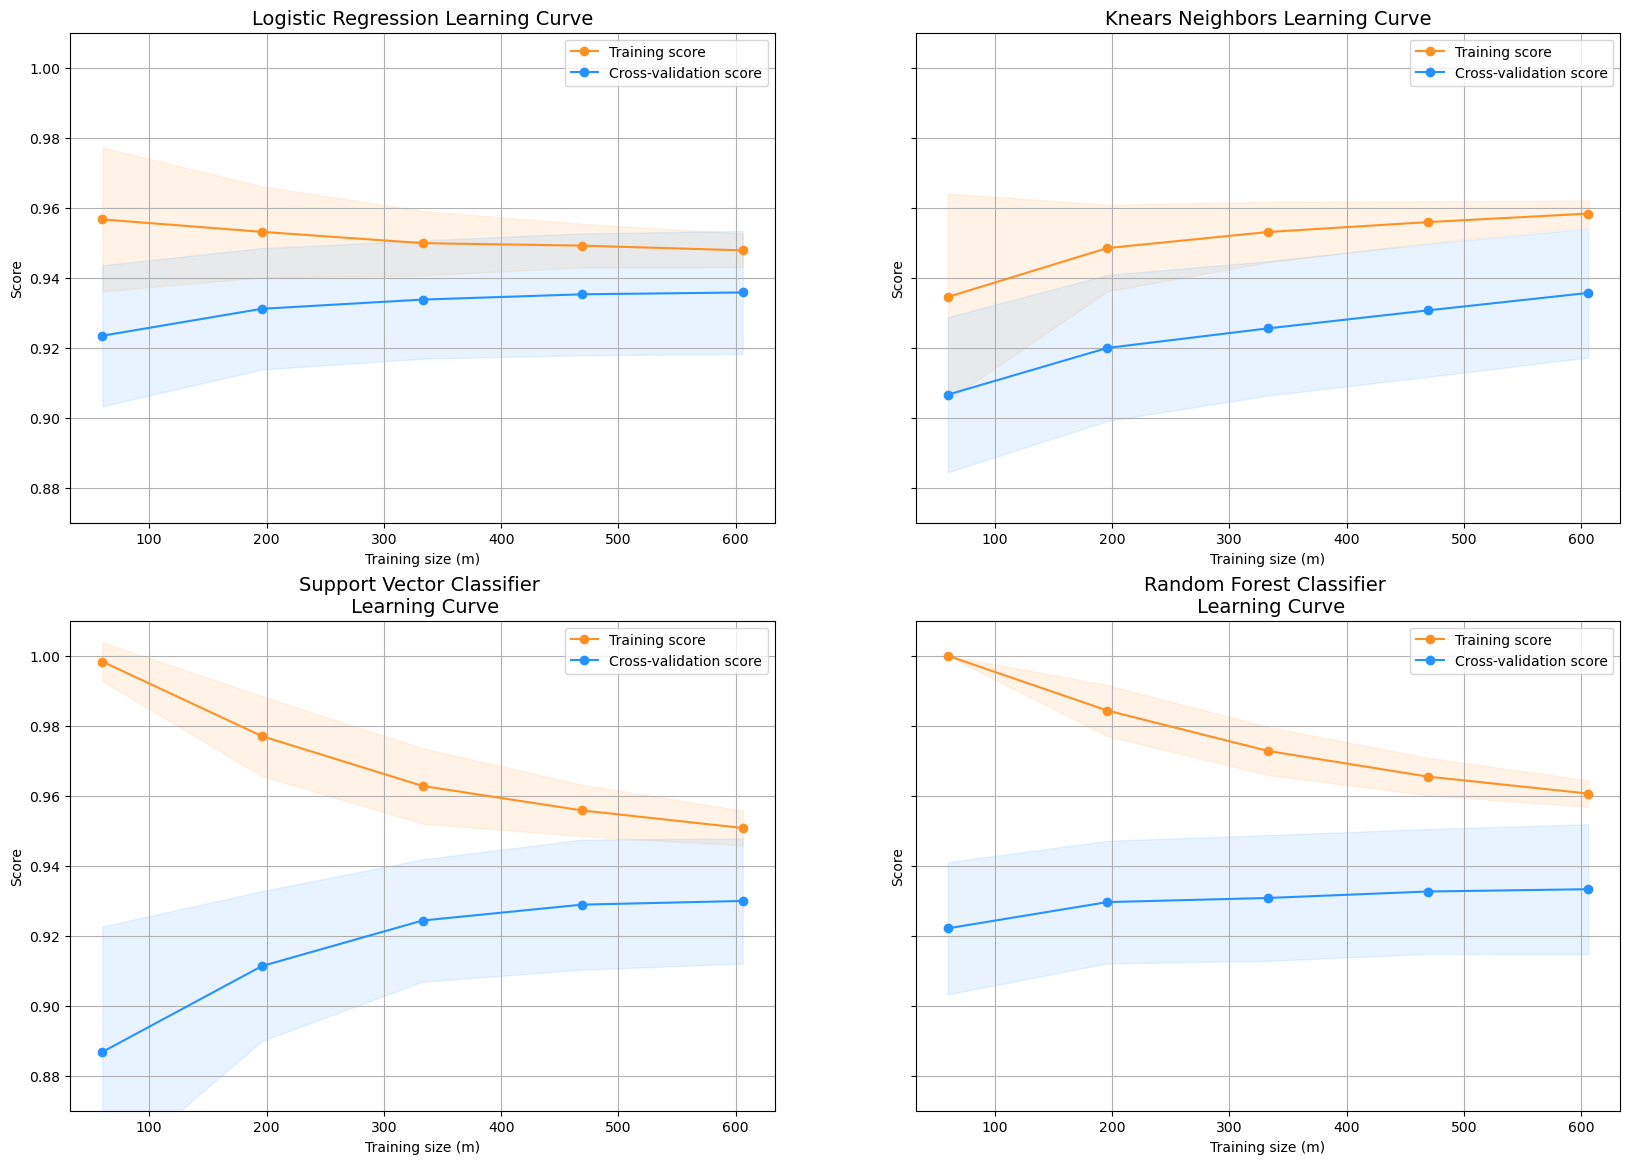

In [33]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, rf_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
<h3 align="left"><font color=#b71c1c>Analysis of Learning Curves for the Four Classifiers:</font></h3>

- **Logistic Regression**, **SVC** and **Random Forest** exhibit the most favorable learning curves, with their training and validation curves converging well, indicating strong generalization abilities and balanced performance on under-sampled data.
- **KNN** shows moderate generalization with some potential for overfitting, but its performance improves with more data.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
# <p style="background-color: #b71c1c; font-family:calibri; color:white; font-size:90%; font-family:Verdana; text-align:center; border-radius:15px 50px;">ROC (Receiver Operating Characteristic):</p>

The ROC (Receiver Operating Characteristic) curve is a graphical plot that illustrates the performance of a binary classification model at various threshold settings. It shows the trade-off between the True Positive Rate (Sensitivity) and the False Positive Rate (1-Specificity). A higher ROC curve indicates a better-performing model, with an area under the curve (AUC) close to 1 signifying excellent model performance and an AUC close to 0.5 indicating no discriminative power.

In [34]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

rf_pred = cross_val_predict(rf_clf, X_train, y_train, cv=5)

In [35]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Random Forest Classifier: ', roc_auc_score(y_train, rf_pred))

Logistic Regression:  0.9695644288185724
KNears Neighbors:  0.9342946034934985
Support Vector Classifier:  0.9618561303644176
Random Forest Classifier:  0.9305067247056198


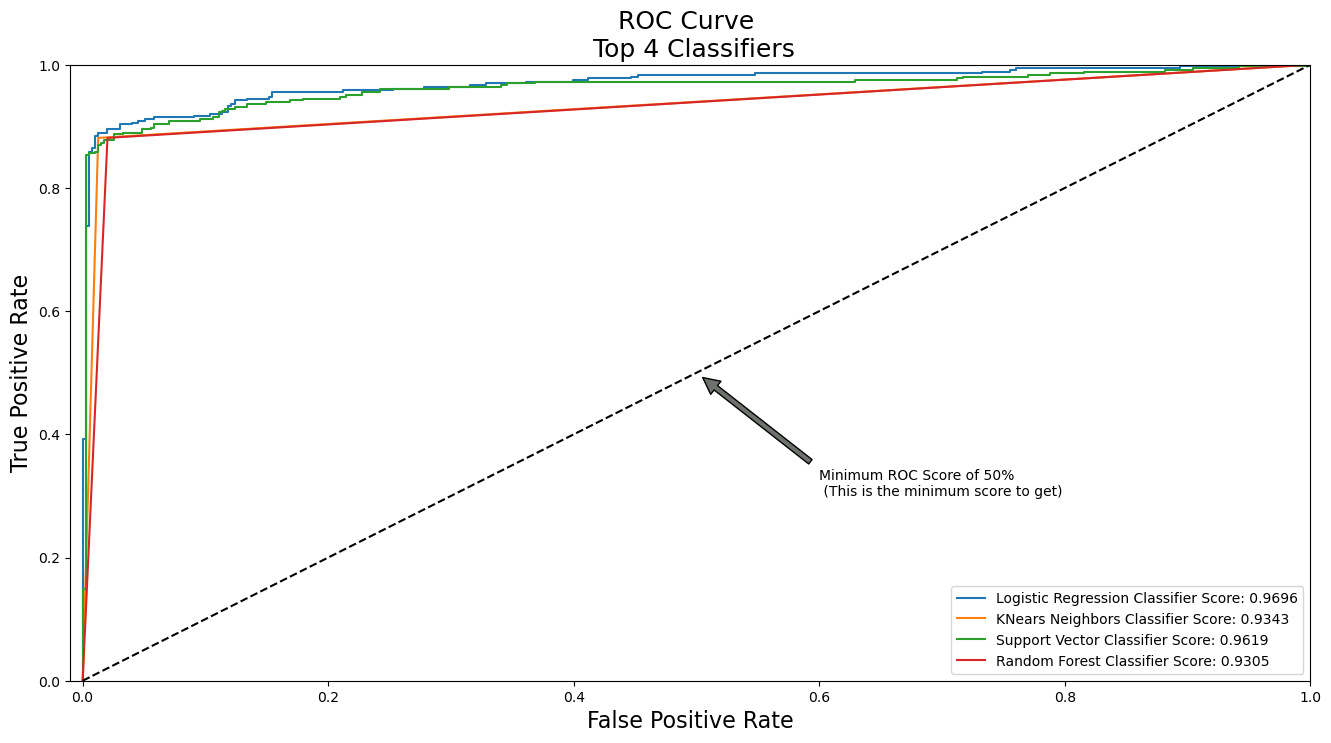

In [36]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_train, rf_pred)
def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, rf_fpr, rf_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train, rf_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, rf_fpr, rf_tpr)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

- **Logistic Regression** and **SVC** are the top performers, with AUC scores indicating they are highly reliable for this classification task.
- **KNN** and **Random Forest** perform reasonably well but falls short of the top two, potentially due to its sensitivity to data distribution and the curse of dimensionality.

# <p style="background-color: #b71c1c; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Logistic Regression ROC Curve</p>

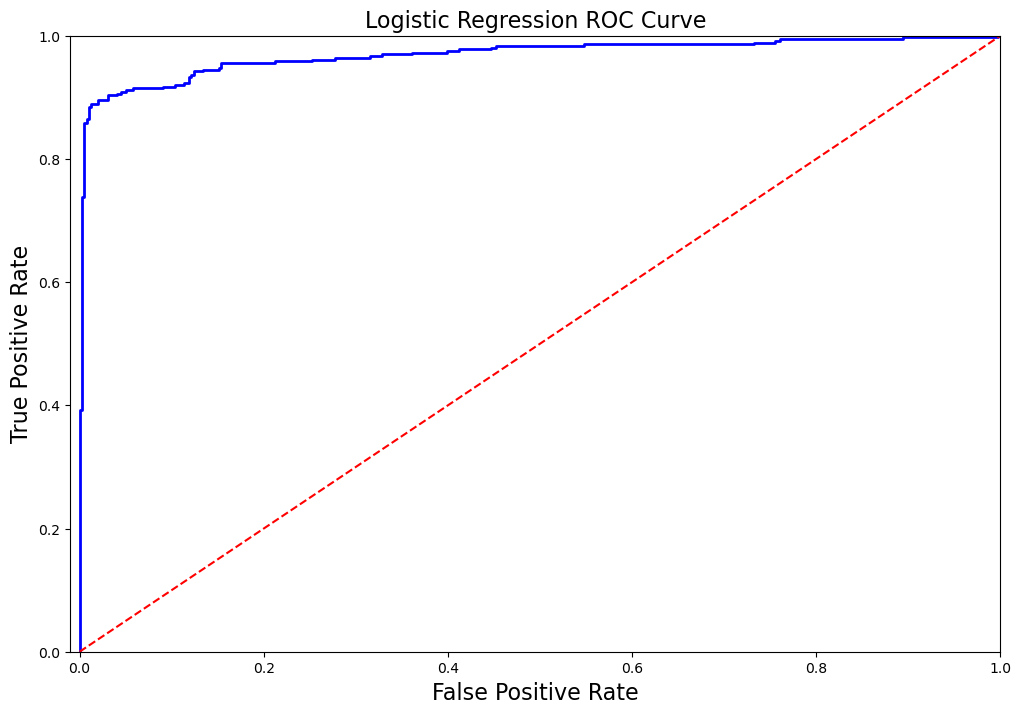

In [37]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
# <p style="background-color: #b71c1c; font-family:calibri; color:white; font-size:90%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Precision-Recall Curve:</p>

The Precision-Recall (PR) curve is a plot that shows the trade-off between precision (positive predictive value) and recall (sensitivity) for different thresholds. Precision is the ratio of true positives to the sum of true positives and false positives, while recall is the ratio of true positives to the sum of true positives and false negatives. The PR curve helps assess a model's performance, especially in imbalanced datasets where positive class examples are rare.

<h3 align="left"><font color=#b71c1c>Importance of Precision and Recall in Credit Card Fraud Detection:</font></h3>

1. **Precision:** In the context of credit card fraud detection, precision measures how many of the transactions flagged as fraudulent are actually fraudulent. High precision means that when the model predicts fraud, it is likely correct. This is crucial to avoid falsely accusing legitimate transactions, which can lead to customer dissatisfaction and operational costs.

2. **Recall:** Recall measures how many of the actual fraudulent transactions were correctly identified by the model. High recall is important to ensure that most fraud cases are detected and prevented, minimizing financial losses and fraud exposure.

<h3 align="left"><font color=#b71c1c>Trade Off:</font></h3>

- **High Precision, Low Recall:** If the model is highly conservative, it will have fewer false positives but may miss many fraudulent transactions. For example, if a model only flags transactions with very high confidence as fraudulent, it might miss some actual fraud cases.

- **High Recall, Low Precision:** If the model is more aggressive, it will catch more fraudulent transactions but may also flag many legitimate transactions as fraud. This can result in higher operational costs and customer inconvenience.

<h3 align="left"><font color=#b71c1c>Examples:</font></h3>

- **Example 1:** A credit card fraud detection system with a high precision of 95% might correctly identify 95% of flagged transactions as fraudulent, but if its recall is only 50%, it might miss 50% of actual fraud cases.

- **Example 2:** Conversely, a system with high recall (90%) but lower precision (60%) will catch most fraud cases but also generate many false positives, requiring manual review of numerous transactions.

In [38]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [39]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.92
Precision Score: 0.85
F1 Score: 0.88
Accuracy Score: 0.89
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.81
Precision Score: 0.00
Recall Score: 0.16
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [40]:
undersample_y_score = log_reg.decision_function(original_Xtest)

# <p style="background-color: #b71c1c; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Undersampling Precision-Recall Curve</p>

In [41]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.04


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.04')

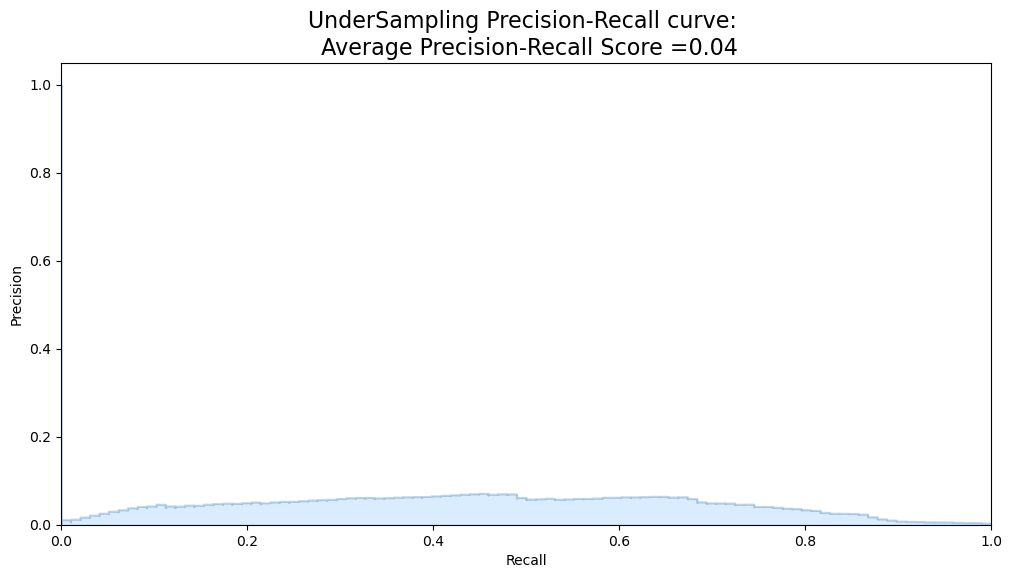

In [42]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
While the model achieves decent accuracy, the very low recall-precision score (0.04) indicates that it struggles significantly with correctly identifying and classifying fraud cases. This suggests that the model is prone to a high number of false positives, making it unreliable in real-world fraud detection scenarios.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
# <p style="background-color: #b71c1c; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">10. SMOTE Technique (Over-sampling)</p><a id="smote"></a>
    
<h3 align="left"><font color=#b71c1c>SMOTE Technique (Over-sampling):</font></h3>

**SMOTE** stands for Synthetic Minority Over-sampling Technique. It is used to address class imbalance by generating synthetic samples for the minority class rather than merely reducing the majority class, as is done with random under-sampling. 

<h3 align="left"><font color=#b71c1c>Understanding SMOTE:</font></h3>

- **Solving Class Imbalance:** SMOTE helps balance the dataset by creating synthetic examples of the minority class. For instance, if you have a dataset with 90% non-fraud and 10% fraud transactions, SMOTE will generate additional fraud samples to make the classes more balanced.

- **Creating Synthetic Points:** SMOTE generates synthetic points by choosing a minority class sample and finding its nearest neighbors. It then creates new samples that lie between the original sample and its neighbors. For example, if a fraud transaction is very close to several other fraud transactions, SMOTE will create new fraud transactions that are interpolated between these existing ones.

- **Retaining Information:** Unlike random under-sampling, which removes some data to balance the classes, SMOTE adds synthetic points, preserving the original dataset's information. This means you retain all the original non-fraud transactions while increasing the representation of fraud transactions.

- **Accuracy vs. Time Tradeoff:** SMOTE can improve model accuracy by providing more balanced data but can increase training time since the dataset size grows with additional synthetic samples. For example, if you add 50% more fraud transactions using SMOTE, your model will train longer due to the increased dataset size.

<h3 align="left"><font color=#b71c1c>Correct Implementation in Cross-Validation:</font></h3>

- **Avoid Data Leakage:** It is crucial not to apply SMOTE before cross-validation because it could introduce data leakage. Data leakage occurs when information from outside the training dataset is used to create the model. For example, if you generate synthetic fraud samples before splitting the data for cross-validation, you might inadvertently include these synthetic samples in the validation set, affecting the evaluation metrics.

- **Proper Method:** The correct approach is to apply SMOTE only within the training data during each fold of cross-validation. For instance, if you're using 5-fold cross-validation, SMOTE should be applied separately in each training fold, ensuring that the synthetic samples are only created from the training data and not from the validation data. This avoids influencing the validation set and provides a more accurate assessment of the model’s performance.

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9424705749141786
precision: 0.0609844809192692
recall: 0.9162934112301201
f1: 0.11267709153612357
---------------------------------------------------------------------------------------------------------------------------------------


In [44]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.10      0.86      0.17        98

    accuracy                           0.99     56961
   macro avg       0.55      0.92      0.58     56961
weighted avg       1.00      0.99      0.99     56961



In [45]:
y_score = best_est.decision_function(original_Xtest)

# <p style="background-color: #b71c1c; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Oversampling Precision-Recall Curve</p>

In [46]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.70


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.70')

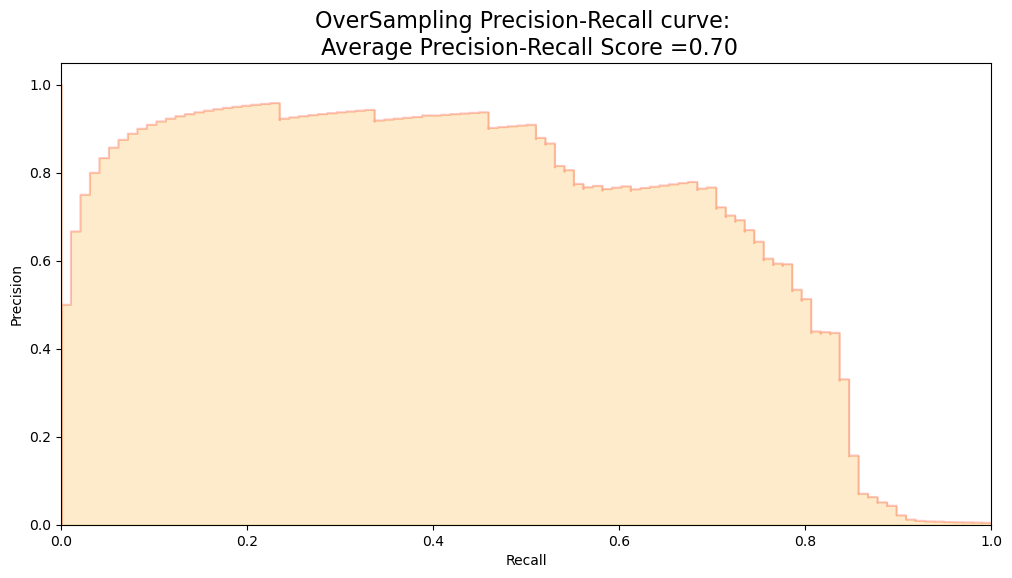

In [47]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
The higher accuracy, combined with a vastly improved recall-precision score (0.70), shows that the model is much better at balancing the detection of fraud cases while minimizing false positives. This makes the oversampling approach more effective for accurate and reliable fraud detection.

In [48]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=42)
# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [49]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.
# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :6.54534912109375 sec


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
# <p style="background-color: #b71c1c; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">11.Test Data with Logistic Regression:</p><a id="test"></a>
    
<h3 align="left"><font color=#b71c1c>Confusion Matrix:</font></h3>
    
**Positive/Negative:** Type of Class (label) ["No", "Yes"]
- **True/False:** Correctly or Incorrectly classified by the model.<br><br>
- **True Negatives (Top-Left Square):** This is the number of **correctly** classifications of the "No" (No Fraud Detected) class.
- **False Negatives (Top-Right Square):** This is the number of **incorrectly** classifications of the "No"(No Fraud Detected) class.
- **False Positives (Bottom-Left Square):** This is the number of **incorrectly** classifications of the "Yes" (Fraud Detected) class
- **True Positives (Bottom-Right Square):** This is the number of **correctly** classifications of the "Yes" (Fraud Detected) class.

<h3 align="left"><font color=#b71c1c>Summary:</font></h3>
<ul>
<li> <b>Random UnderSampling:</b> We will evaluate the final performance of the classification models in the random undersampling subset. <b>Keep in mind that this is not the data from the original dataframe. </b> </li>
<li> <b>Classification Models: </b> The models that performed the best were <b>logistic regression </b> and <b>support vector classifier (SVM)</b>  </li>
</ul>

# <p style="background-color: #b71c1c; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Confusion Matrix</p> 

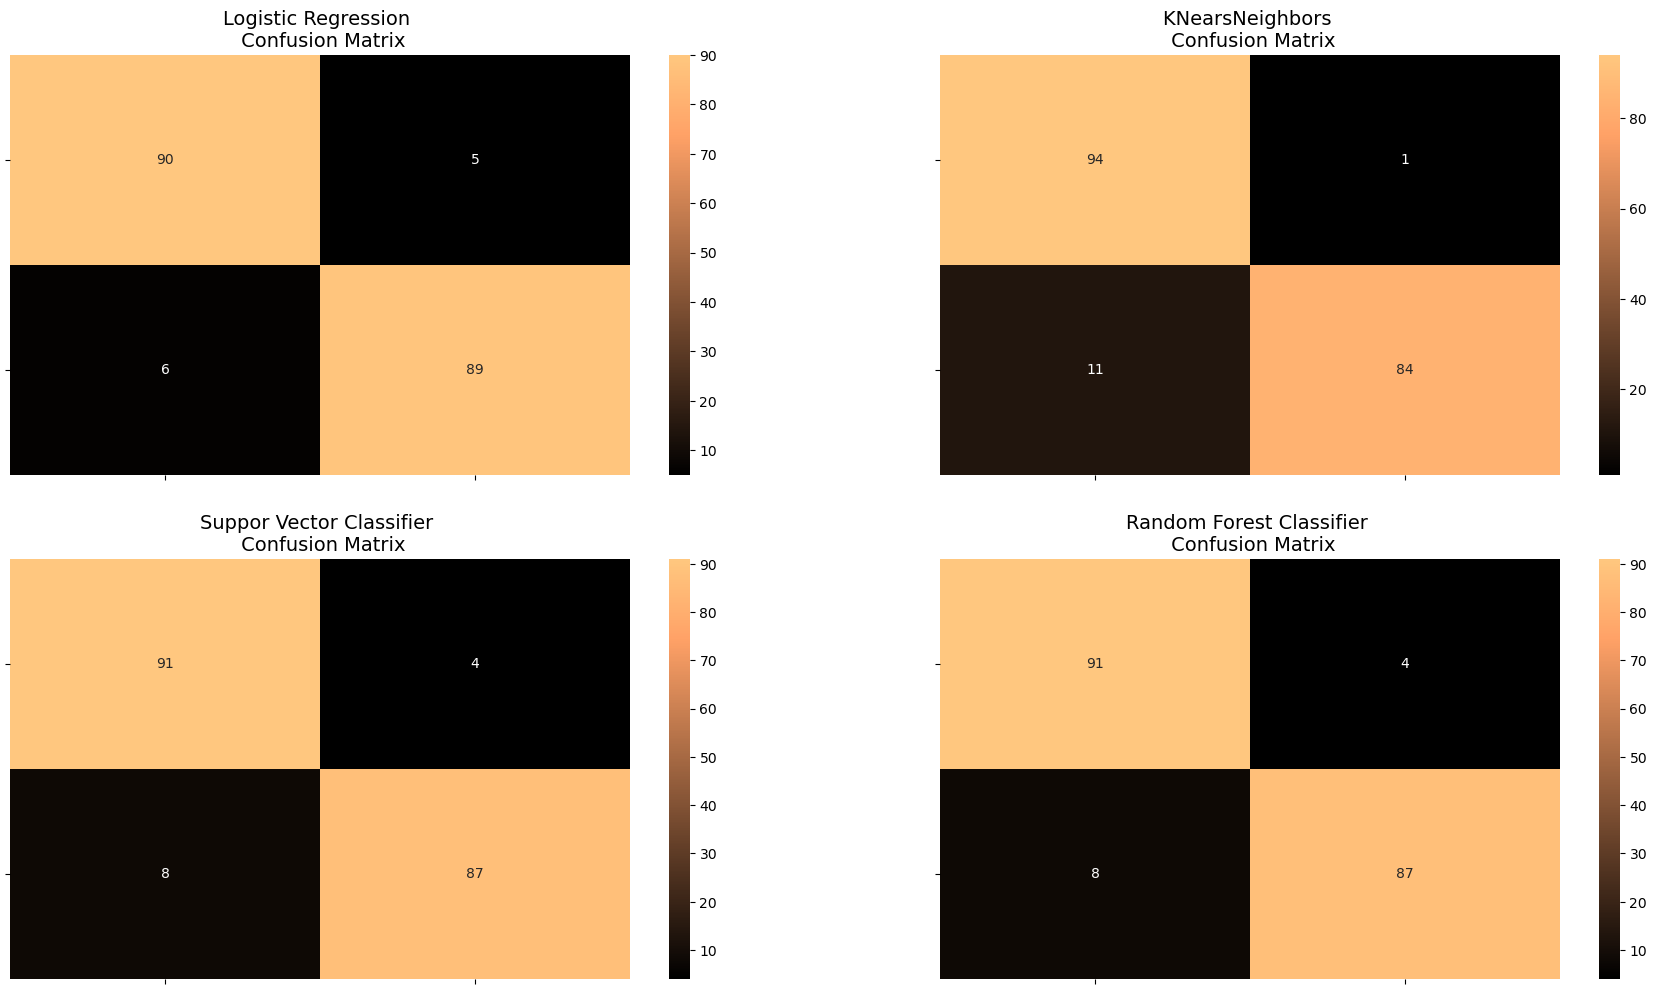

In [52]:
from sklearn.metrics import confusion_matrix
# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
rf_cf = confusion_matrix(y_test, y_pred_rf)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(rf_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

# <p style="background-color: #b71c1c; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Classification Report</p>

In [53]:
from sklearn.metrics import classification_report
print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))
print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))
print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))
print('Random Forest Classifier:')
print(classification_report(y_test, y_pred_rf))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        95
           1       0.95      0.94      0.94        95

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        95
           1       0.99      0.88      0.93        95

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        95
           1       0.96      0.92      0.94        95

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted

# <p style="background-color: #b71c1c; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">12. Comparison between Undersampling and Oversampling Score of Logistic Regression</p><a id=comparison></a>

In [54]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.942105
1,Oversampling (SMOTE),0.985850


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
# <p style="background-color: #b71c1c; font-family:calibri; color:white; font-size:90%; font-family:Verdana; text-align:center; border-radius:15px 50px;">13. Neural Networks Testing: Random UnderSampling vs. OverSampling (SMOTE): </p><a id="neural"></a>

In this section, we will test a simple neural network model to evaluate which of two preprocessing methods—random undersampling or oversampling using SMOTE—leads to better accuracy in detecting both fraud and non-fraud transactions.

<h3 align="left"><font color=#b71c1c>Objective:</font></h3>

Our primary goal is to assess how well a basic neural network performs on datasets prepared using two different approaches to handling class imbalance:

1. **Random Undersampling:** This technique reduces the number of majority class samples to balance the class distribution.
2. **Oversampling (SMOTE):** This method generates synthetic samples for the minority class to achieve a balanced dataset.

We aim to see how accurately our neural network can classify both fraud and non-fraud transactions. It is important to balance the detection of both types of transactions to avoid situations where a legitimate transaction is incorrectly flagged as fraud.

<h3 align="left"><font color=#b71c1c>Confusion Matrix Overview:</font></h3>

To evaluate the performance of our neural network, we'll use a confusion matrix, which provides insight into the model's classification results:

- **Upper Left Square:** Number of transactions correctly classified as non-fraud.
- **Upper Right Square:** Number of transactions incorrectly classified as fraud when they are actually non-fraud.
- **Lower Left Square:** Number of transactions incorrectly classified as non-fraud when they are actually fraud.
- **Lower Right Square:** Number of transactions correctly classified as fraud.

<h3 align="left"><font color=#b71c1c>Neural Network Configuration:</font></h3>

- **Dataset:** We will apply the neural network to both the random undersampled dataset and the oversampled (SMOTE) dataset, using the original dataframe's testing data for evaluation.
  
- **Neural Network Structure:** 
  - **Input Layer:** Matches the number of features in the dataset, plus a bias node.
  - **Hidden Layer:** Contains 32 nodes.
  - **Output Layer:** Has one node for each possible outcome (fraud or non-fraud).

- **Training Details:**
  - **Learning Rate:** Set to 0.001.
  - **Optimizer:** AdamOptimizer is used.
  - **Activation Function:** ReLU (Rectified Linear Unit) for the hidden layer.
  - **Loss Function:** Sparse categorical cross-entropy, which calculates the probability of each class and selects the class with the highest probability for predictions.

By comparing the performance of the neural network on the undersampled and oversampled datasets, we can determine which preprocessing technique provides better results in accurately classifying both fraud and non-fraud transactions.

In [55]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [56]:
# Define the model creation function
def create_model(n_inputs):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(n_inputs, activation='relu', input_shape=(n_inputs,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    return model

In [57]:
# Compile the model
def compile_model(model):
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [58]:
# Plot confusion matrix function
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [59]:
# Undersample model
n_inputs = X_train.shape[1]
undersample_model = create_model(n_inputs)
compile_model(undersample_model)

In [60]:
# Train undersample model
undersample_history = undersample_model.fit(X_train, y_train, 
                                            validation_split=0.2, 
                                            batch_size=25, 
                                            epochs=20, 
                                            shuffle=True, 
                                            verbose=2)

Epoch 1/20
25/25 - 0s - loss: 1.2744 - accuracy: 0.5743 - val_loss: 0.4113 - val_accuracy: 0.7566
Epoch 2/20
25/25 - 0s - loss: 0.4342 - accuracy: 0.7690 - val_loss: 0.3207 - val_accuracy: 0.9276
Epoch 3/20
25/25 - 0s - loss: 0.3363 - accuracy: 0.8861 - val_loss: 0.2917 - val_accuracy: 0.9276
Epoch 4/20
25/25 - 0s - loss: 0.2881 - accuracy: 0.9092 - val_loss: 0.2578 - val_accuracy: 0.9539
Epoch 5/20
25/25 - 0s - loss: 0.2512 - accuracy: 0.9208 - val_loss: 0.2319 - val_accuracy: 0.9539
Epoch 6/20
25/25 - 0s - loss: 0.2243 - accuracy: 0.9224 - val_loss: 0.2140 - val_accuracy: 0.9671
Epoch 7/20
25/25 - 0s - loss: 0.2018 - accuracy: 0.9290 - val_loss: 0.1985 - val_accuracy: 0.9671
Epoch 8/20
25/25 - 0s - loss: 0.1840 - accuracy: 0.9389 - val_loss: 0.1885 - val_accuracy: 0.9737
Epoch 9/20
25/25 - 0s - loss: 0.1702 - accuracy: 0.9422 - val_loss: 0.1860 - val_accuracy: 0.9671
Epoch 10/20
25/25 - 0s - loss: 0.1607 - accuracy: 0.9422 - val_loss: 0.1979 - val_accuracy: 0.9803
Epoch 11/20
25/25 -

In [61]:
# Oversample model (SMOTE)
n_inputs = Xsm_train.shape[1]
oversample_model = create_model(n_inputs)
compile_model(oversample_model)

In [62]:
# Train oversample model
oversample_history = oversample_model.fit(Xsm_train, ysm_train, 
                                          validation_split=0.2, 
                                          batch_size=300, 
                                          epochs=20, 
                                          shuffle=True, 
                                          verbose=2)

Epoch 1/20
1214/1214 - 1s - loss: 0.0658 - accuracy: 0.9769 - val_loss: 0.0241 - val_accuracy: 0.9937
Epoch 2/20
1214/1214 - 1s - loss: 0.0131 - accuracy: 0.9969 - val_loss: 0.0098 - val_accuracy: 0.9999
Epoch 3/20
1214/1214 - 1s - loss: 0.0075 - accuracy: 0.9984 - val_loss: 0.0056 - val_accuracy: 0.9994
Epoch 4/20
1214/1214 - 1s - loss: 0.0055 - accuracy: 0.9989 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 5/20
1214/1214 - 1s - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 6/20
1214/1214 - 1s - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 7/20
1214/1214 - 1s - loss: 0.0028 - accuracy: 0.9994 - val_loss: 9.7360e-04 - val_accuracy: 1.0000
Epoch 8/20
1214/1214 - 1s - loss: 0.0024 - accuracy: 0.9995 - val_loss: 7.7804e-04 - val_accuracy: 1.0000
Epoch 9/20
1214/1214 - 1s - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 10/20
1214/1214 - 1s - loss: 0.0021 - accuracy: 0.9996 - val_loss: 6

In [63]:
# Make predictions
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200)
undersample_fraud_predictions = tf.argmax(undersample_predictions, axis=1)

oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200)
oversample_fraud_predictions = tf.argmax(oversample_predictions, axis=1)

In [64]:
# Create confusion matrices
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
oversample_cm = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)

# <p style="background-color: #b71c1c; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Confusion matrix of Random Undersampling, Oversampling and with 100% accuracy</p>

Confusion matrix, without normalization
[[55131  1732]
 [    9    89]]
Confusion matrix, without normalization
[[56846    17]
 [   29    69]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


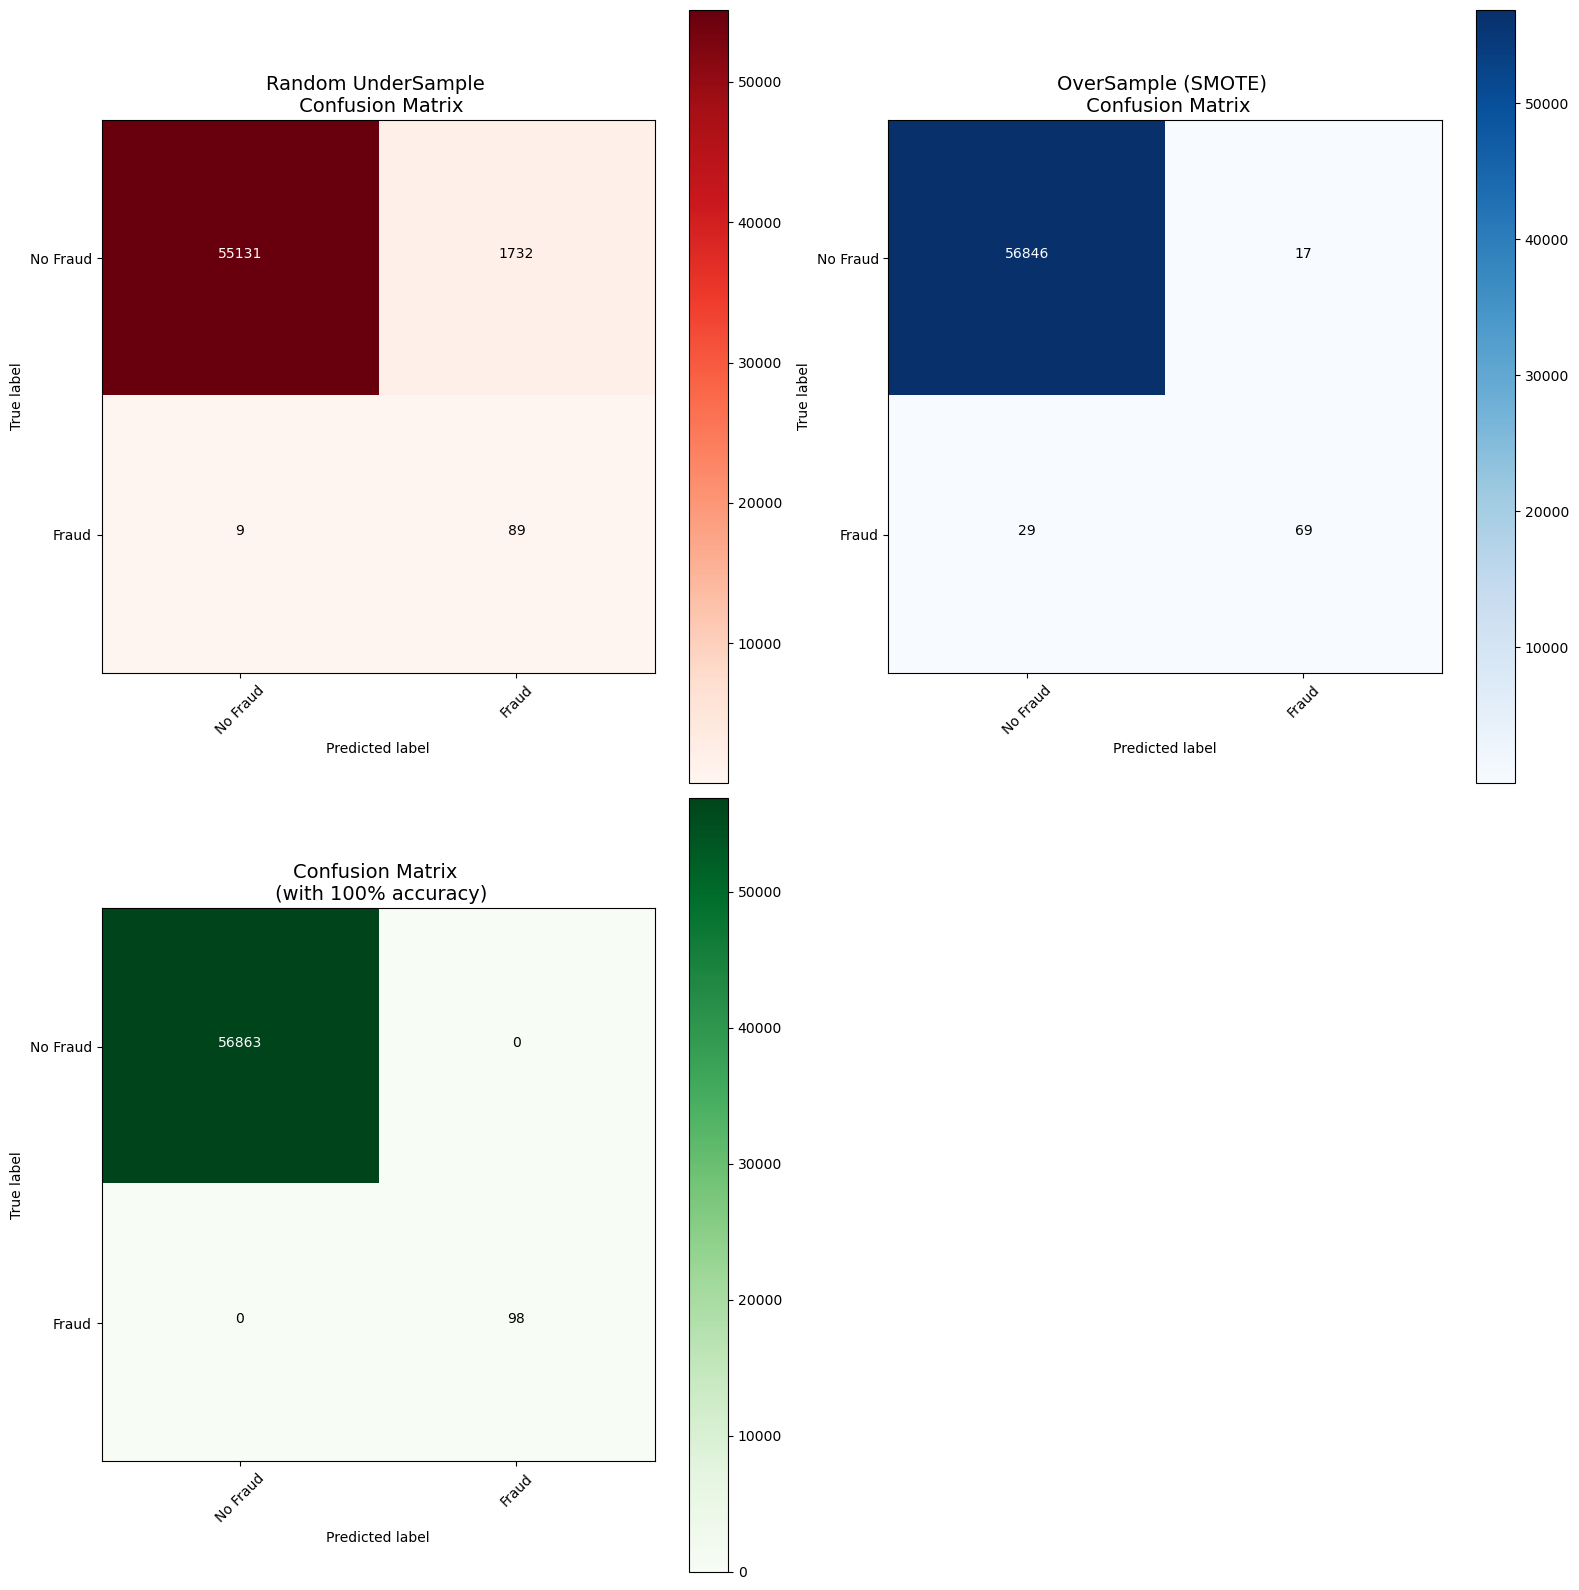

In [65]:
# Plot results
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16, 16))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(oversample_cm, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Blues)

fig.add_subplot(223)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

plt.tight_layout()
plt.show()

In [66]:
# Print classification reports
from sklearn.metrics import classification_report

print("Undersampling Neural Network:")
print(classification_report(original_ytest, undersample_fraud_predictions))

print("\nOversampling (SMOTE) Neural Network:")
print(classification_report(original_ytest, oversample_fraud_predictions))

Undersampling Neural Network:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56863
           1       0.05      0.91      0.09        98

    accuracy                           0.97     56961
   macro avg       0.52      0.94      0.54     56961
weighted avg       1.00      0.97      0.98     56961


Oversampling (SMOTE) Neural Network:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.80      0.70      0.75        98

    accuracy                           1.00     56961
   macro avg       0.90      0.85      0.87     56961
weighted avg       1.00      1.00      1.00     56961



<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h2 align="left"><font color=#b71c1c>Analysis of Neural Network Performance: Undersampling vs. Oversampling:</font></h2>

When dealing with highly imbalanced datasets, such as the one used for credit card fraud detection, accuracy alone is not a reliable metric due to the significant disparity between the classes. Instead, precision, recall, and the F1-score provide a better understanding of the model's performance, especially in the context of fraud detection where the minority class (fraud) is of utmost importance.

<h2 align="left"><font color=#b71c1c>Comparison:</font></h2>

- **Undersampling:** The undersampling approach yields a model with high recall but extremely low precision for the fraud class. This means the model is overly sensitive, flagging many transactions as fraud (including many false positives), which could lead to unnecessary investigations and operational inefficiencies.
  
- **Oversampling (SMOTE):** The SMOTE approach produces a model with a much better balance between precision and recall. It is more conservative in predicting fraud, resulting in fewer false positives while still identifying a significant proportion of actual fraud cases. The F1-score improvement indicates that the model is better at handling the minority class (fraud) after oversampling.

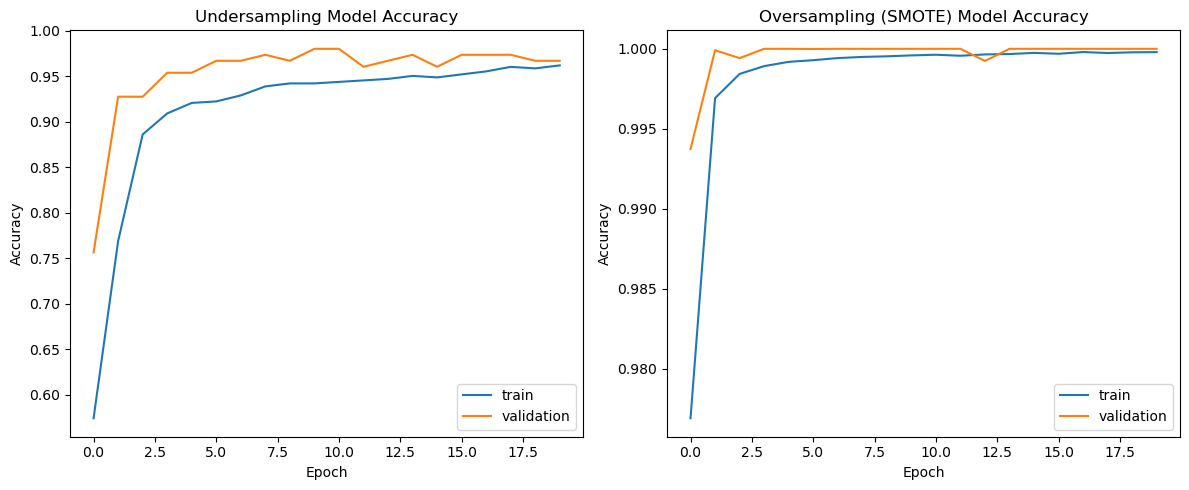

In [67]:
# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.plot(undersample_history.history['accuracy'], label='train')
plt.plot(undersample_history.history['val_accuracy'], label='validation')
plt.title('Undersampling Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(122)
plt.plot(oversample_history.history['accuracy'], label='train')
plt.plot(oversample_history.history['val_accuracy'], label='validation')
plt.title('Oversampling (SMOTE) Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
# <p style="background-color: #b71c1c; font-family:calibri; color:white; font-size:90%; font-family:Verdana; text-align:center; border-radius:15px 50px;">14. Conclusion: </p><a id="conclusion"></a>
    
This project aimed to develop an effective model for credit card fraud detection, addressing the challenges of imbalanced data and evaluating various classification techniques. Our analysis has led to several key insights:

1. **Handling Class Imbalance:**
   We explored both undersampling and oversampling (SMOTE) techniques. SMOTE consistently outperformed undersampling, providing a better balance between precision and recall for fraud detection across different models.

2. **Model Performance:**
   - Among traditional classifiers with undersampling, Logistic Regression and Support Vector Classifier showed the best performance when correctly applied within cross-validation.
   - The neural network, especially when combined with SMOTE, ultimately provided the best overall performance, demonstrating superior ability in balancing precision and recall for fraud detection.

3. **Importance of Correct Methodology:**
   Our results highlight the critical importance of applying sampling techniques correctly within cross-validation to avoid data leakage and obtain realistic performance estimates.

4. **Comparative Analysis:**
   - Traditional Classifiers (undersampling within cross-validation):
     * Logistic Regression: AUC 0.9696
     * Support Vector Classifier: AUC 0.9619
     * K-Nearest Neighbors: AUC 0.9343
     * Random Forest: AUC 0.9305
   
   - Logistic Regression (SMOTE):
     * Accuracy: 0.9859
     * Precision-Recall Score: 0.70

   - Neural Network (SMOTE):
     * Accuracy: 1.00
     * Precision for fraud: 0.80
     * Recall for fraud: 0.70
     * F1-score for fraud: 0.75

5. **Best Performing Model:**
   The neural network with SMOTE emerged as the most promising approach, showing high accuracy and a good balance between precision and recall in fraud detection.

6. **Trade-offs and Considerations:**
   While SMOTE significantly improved performance, it's important to note that it increases computational cost. The choice of method should always consider specific constraints including computational resources, interpretability needs, and the relative costs of false positives versus false negatives in fraud detection.

In conclusion, this project demonstrates the effectiveness of combining advanced sampling techniques like SMOTE with sophisticated models such as neural networks for credit card fraud detection. The high performance of our best model suggests it could be highly effective in real-world scenarios. However, it is important to note that the neural network trained on the oversampled dataset sometimes performed worse in correctly predicting fraud transactions compared to the model trained on the undersampled dataset.

One reason for this discrepancy could be that outlier removal was applied only to the random undersampled dataset and not to the oversampled one. In the undersampled dataset, our model struggled to correctly classify many non-fraud transactions, misclassifying them as fraud cases. This issue highlights a significant risk: if a model incorrectly labels legitimate transactions as fraud, it could lead to customer dissatisfaction and an increase in complaints due to blocked cards for regular purchases.

Future work could explore more advanced neural network architectures, ensemble methods, or the integration of additional data sources to further improve fraud detection capabilities.

</div>